# CAPSTONE PROJECT - RYAN LARSEN

## CUSTOMER CHURN

- customerID: Unique identifier for each customer.
- gender: Customer's gender, Male or Female.
- SeniorCitizen: Indicates if the customer is 65 or older, Yes or No.
- Partner: Indicates if the customer is married, Yes or No.
- Dependents: Indicates if the customer lives with any dependents, Yes or No.
- tenure: The total number of months the customer has been with the company.
- PhoneService: Indicates if the customer subscribes to home phone service, Yes or No.
- MultipleLines: Indicates if the customer subscribes to multiple telephone lines, Yes or No.
- InternetService: Type of Internet service the customer subscribes to, No, DSL, Fiber Optic, or Cable.
- OnlineSecurity: Indicates if the customer subscribes to an additional online security service, Yes or No.
- OnlineBackup: Indicates if the customer subscribes to an additional online backup service, Yes or No.
- DeviceProtection: Indicates if the customer subscribes to a device protection plan, Yes or No.
- TechSupport: Indicates if the customer subscribes to a technical support plan with reduced wait times, Yes or No.
- StreamingTV: Indicates if the customer streams television programming, Yes or No.
- StreamingMovies: Indicates if the customer streams movies, Yes or No.
- Contract: The customer's current contract type, Month-to-Month, One Year, or Two Year.
- PaperlessBilling: Indicates if the customer has chosen paperless billing, Yes or No.
- PaymentMethod: Method by which the customer pays their bill, Bank Withdrawal, Credit Card, Mailed Check.
- MonthlyCharges: The customer's current total monthly charge for all services.
- TotalCharges: The customer's total charges, calculated to the end of the specified quarter.
- Churn: Indicates the status of the customer at the end of the quarter, Churned or Stayed.

#### IMPORT LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
import shap

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


#### LOAD DATA

In [2]:
data = ('/Users/ryanlarsen/Desktop/CAPSTONE/telco_customer_churn.csv')
df = pd.read_csv(data)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,'No phone service',DSL,No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,'No phone service',DSL,Yes,...,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,10840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,'Fiber optic',No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes


#### DATA INFORMATION

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7045 entries, 0 to 7044
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7045 non-null   object 
 1   gender            7045 non-null   object 
 2   SeniorCitizen     7044 non-null   object 
 3   Partner           7045 non-null   object 
 4   Dependents        7045 non-null   object 
 5   tenure            7045 non-null   int64  
 6   PhoneService      7044 non-null   object 
 7   MultipleLines     7044 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7045 non-null   object 
 10  OnlineBackup      7045 non-null   object 
 11  DeviceProtection  7045 non-null   object 
 12  TechSupport       7045 non-null   object 
 13  StreamingTV       7045 non-null   object 
 14  StreamingMovies   7045 non-null   object 
 15  Contract          7045 non-null   object 
 16  PaperlessBilling  7045 non-null   object 


In [5]:
df.shape

(7045, 21)

## DATA CLEANING

In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       1
Partner             0
Dependents          0
tenure              0
PhoneService        1
MultipleLines       1
InternetService     2
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      2
TotalCharges        2
Churn               0
dtype: int64

#### COLUMN RENAMING

In [7]:
df = df.rename (columns = {
    'customerID':'customer_id',
    'SeniorCitizen':'senior_citizen',
    'Partner':'partner',
    'Dependents':'dependents',
    'PhoneService':'phone_service',
    'MultipleLines':'multiple_lines',
    'InternetService':'internet_service',
    'OnlineSecurity':'online_security',
    'OnlineBackup':'online_backup',
    'DeviceProtection':'device_protection',
    'TechSupport':'tech_support',
    'StreamingTV':'streaming_tv',
    'StreamingMovies':'streaming_movies',
    'Contract':'contract_type',
    'PaperlessBilling':'paperless_billing',
    'PaymentMethod':'payment_method',
    'MonthlyCharges':'monthly_charges',
    'TotalCharges':'total_charges',
    'Churn':'churn'})

In [8]:
df.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'contract_type',
       'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'churn'],
      dtype='object')

In [9]:
df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,'No phone service',DSL,No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,'One year',No,'Mailed check',56.95,1889.5,No
2,3668-QPYBK,Male,NaN,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,'Mailed check',53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,'No phone service',DSL,Yes,...,Yes,Yes,No,No,'One year',No,'Bank transfer (automatic)',42.30,10840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,'Fiber optic',No,...,No,No,No,No,Month-to-month,Yes,'Electronic check',70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,'Fiber optic',No,...,Yes,No,Yes,Yes,Month-to-month,Yes,'Electronic check',99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,'Fiber optic',No,...,No,No,Yes,No,Month-to-month,Yes,'Credit card (automatic)',89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,'No phone service',DSL,Yes,...,No,No,No,No,Month-to-month,No,'Mailed check',29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,'Fiber optic',No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,'Electronic check',104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,'One year',No,'Bank transfer (automatic)',56.15,3487.95,No


In [10]:
# Remove quotes from string columns
df = df.apply(lambda x: x.str.replace("'", "") if x.dtype == "object" else x)

# Convert 'total_charges' to numeric
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Impute missing values for numerical columns with their mean
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].mean(), inplace=True)

# For categorical columns, impute missing values with the mode
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].mode()[0], inplace=True)

# After imputation, if there are still any rows with missing values, drop them
df.dropna(inplace=True)


#### DATA PROFILING

In [11]:

for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")


Unique values in customer_id: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male' 'M' 'F']
Unique values in senior_citizen: ['0' '1' 'No' 'Yes']
Unique values in partner: ['Yes' 'No']
Unique values in dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in phone_service: ['No' 'Yes']
Unique values in multiple_lines: ['No phone service' 'No' 'Yes']
Unique values in internet_service: ['DSL' 'Fiber optic' 'No']
Unique values in online_security: ['No' 'Yes' 'No internet service']
Unique values in online_backup: ['Yes' 'No' 'No internet service']
Unique values in device_protection: ['No' 'Yes' 'No internet service']
Unique values in tech_support: ['No' 'Yes' 'No internet service']
Uniqu

In [12]:
# Recoding gender
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})

# Recoding senior_citizen
df['senior_citizen'] = df['senior_citizen'].replace({'No': 0, 'Yes': 1})


In [13]:
columns_of_interest = ['gender','senior_citizen']

for column in columns_of_interest:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in gender: ['Female' 'Male']
Unique values in senior_citizen: ['0' '1' 0 1]


In [14]:
df['senior_citizen'] = df['senior_citizen'].astype(int)
print("Unique values in 'senior_citizen':", df['senior_citizen'].unique())


Unique values in 'senior_citizen': [0 1]


In [15]:
df = df.replace({"'": ''}, regex=True)


#### NULL VALUES

In [16]:
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract_type        0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [17]:
# drop null rows
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

customer_id          0
gender               0
senior_citizen       0
partner              0
dependents           0
tenure               0
phone_service        0
multiple_lines       0
internet_service     0
online_security      0
online_backup        0
device_protection    0
tech_support         0
streaming_tv         0
streaming_movies     0
contract_type        0
paperless_billing    0
payment_method       0
monthly_charges      0
total_charges        0
churn                0
dtype: int64

In [19]:
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')


#### REMOVING DUPLICATES

In [20]:
# Check for duplicates in the 'customer_id' column
duplicates = df.duplicated(subset='customer_id', keep=False)

# Get the rows with duplicate 'customer_id'
duplicate_rows = df[duplicates]

# Display the duplicate rows
print(duplicate_rows)


     customer_id gender  senior_citizen partner dependents  tenure  \
2916  4139-JPIAM   Male               0      No         No      51   
2917  4139-JPIAM   Male               0      No         No      51   
5148  7622-NXQZR   Male               0      No         No      28   
5149  7622-NXQZR   Male               0      No         No      28   

     phone_service    multiple_lines internet_service online_security  ...  \
2916            No  No phone service              DSL             Yes  ...   
2917            No  No phone service              DSL             Yes  ...   
5148            No  No phone service              DSL              No  ...   
5149            No  No phone service              DSL              No  ...   

     device_protection tech_support streaming_tv streaming_movies  \
2916                No          Yes           No              Yes   
2917                No          Yes           No              Yes   
5148                No          Yes           No   

In [21]:
# Print the shape of the DataFrame before dropping duplicates
print("Shape before dropping duplicates:", df.shape)

# Drop duplicate rows based on the 'customer_id' column
df.drop_duplicates(subset='customer_id', keep='first', inplace=True)

# Print the shape of the DataFrame after dropping duplicates
print("Shape after dropping duplicates:", df.shape)


Shape before dropping duplicates: (7045, 21)
Shape after dropping duplicates: (7043, 21)


In [22]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,10840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### HANDLING OUTLIERS

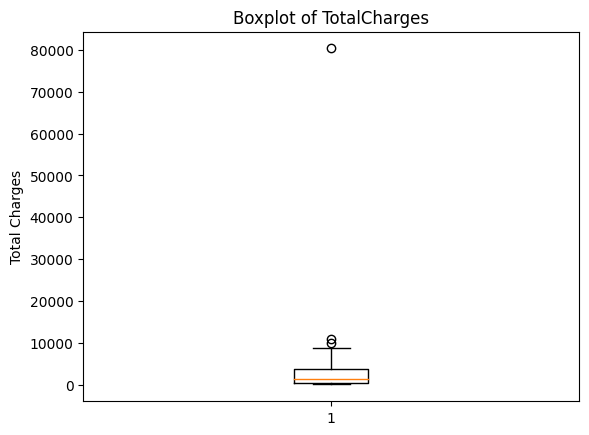

In [23]:
# Convert 'TotalCharges' to a numeric data type and coerce errors
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')

# Alternatively, if you want to drop the rows with NaN 'TotalCharges'
df = df.dropna(subset=['total_charges'])

# Now 'TotalCharges' is ready for boxplot
plt.boxplot(df['total_charges'])
plt.title('Boxplot of TotalCharges')
plt.ylabel('Total Charges')
plt.show()


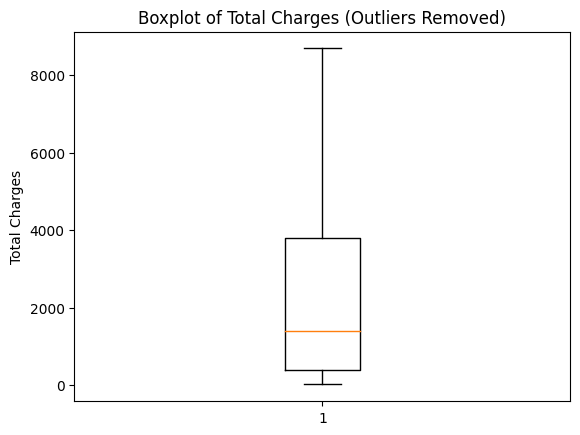

In [24]:
# Calculate the IQR
Q1 = df['total_charges'].quantile(0.25)
Q3 = df['total_charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
df = df[(df['total_charges'] >= lower_bound) & (df['total_charges'] <= upper_bound)]

# Plot the boxplot
plt.boxplot(df['total_charges'])
plt.title('Boxplot of Total Charges (Outliers Removed)')
plt.ylabel('Total Charges')
plt.show()


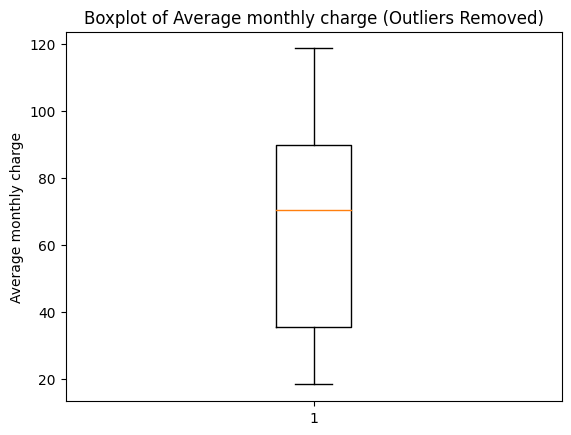

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the IQR
Q1 = df['monthly_charges'].quantile(0.25)
Q3 = df['monthly_charges'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataframe to exclude outliers
df = df[(df['monthly_charges'] >= lower_bound) & (df['monthly_charges'] <= upper_bound)]

# Plot the boxplot
plt.boxplot(df['monthly_charges'])
plt.title('Boxplot of Average monthly charge (Outliers Removed)')
plt.ylabel('Average monthly charge')
plt.show()



#### LABEL ENCODING

In [26]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Assuming your DataFrame is named df

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Iterate through each column in the DataFrame
for column in df.columns:
    if column != 'customer_id':  # Add this condition to exclude customer_id column
        if df[column].dtype == 'object':
            # Fit and transform the LabelEncoder for object columns
            df[column] = label_encoder.fit_transform(df[column])

# Convert the encoded columns to int64 data type
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype('int64')

# Convert 'total_charges' column to numeric type
df['total_charges'] = pd.to_numeric(df['total_charges'], errors='coerce')


In [27]:
df.head(10)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,9305-CDSKC,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1452-KIOVK,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,6713-OKOMC,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,7892-POOKP,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,6388-TABGU,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0
10,9763-GRSKD,1,0,1,1,13,1,0,0,2,...,0,0,0,0,0,1,3,49.95,587.45,0


In [28]:

# Drop the "customerID" column from the DataFrame
df = df.drop(columns=['customer_id'])


In [29]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1


In [30]:
df['monthly_charges'] = df['monthly_charges'].astype(int)
df['total_charges'] = df['total_charges'].astype(int)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7040 entries, 0 to 7044
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   gender             7040 non-null   int64
 1   senior_citizen     7040 non-null   int64
 2   partner            7040 non-null   int64
 3   dependents         7040 non-null   int64
 4   tenure             7040 non-null   int64
 5   phone_service      7040 non-null   int64
 6   multiple_lines     7040 non-null   int64
 7   internet_service   7040 non-null   int64
 8   online_security    7040 non-null   int64
 9   online_backup      7040 non-null   int64
 10  device_protection  7040 non-null   int64
 11  tech_support       7040 non-null   int64
 12  streaming_tv       7040 non-null   int64
 13  streaming_movies   7040 non-null   int64
 14  contract_type      7040 non-null   int64
 15  paperless_billing  7040 non-null   int64
 16  payment_method     7040 non-null   int64
 17  monthly_charges    

# EDA

#### Churn Distribution

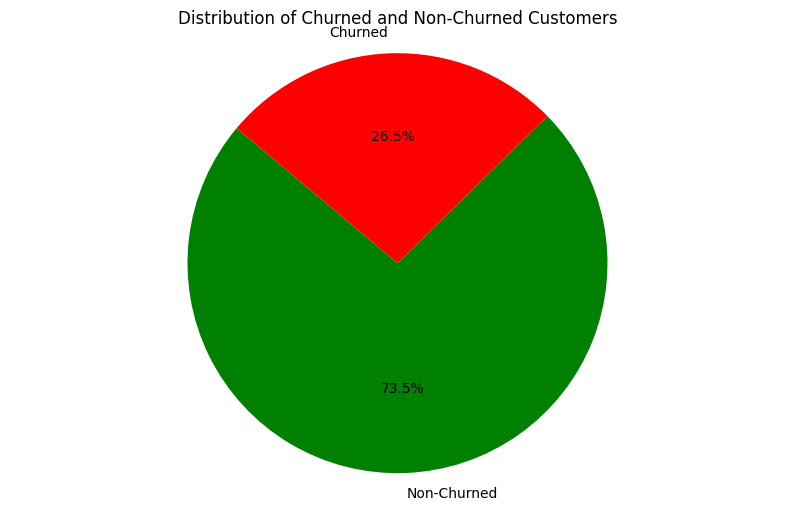

In [32]:
import matplotlib.pyplot as plt

# Assume 'churn' column is where 1 represents churned customers and 0 represents non-churned customers
churn_values = df['churn'].value_counts()

# Create labels
labels = ['Non-Churned', 'Churned']

# Specify colors (lighter red: #FF9999 is an RGB color where FF is red, 99 is green and 99 is blue)
colors = ['green', 'red']

# Create a pie chart
plt.figure(figsize=(10, 6))
plt.pie(churn_values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Add title
plt.title('Distribution of Churned and Non-Churned Customers')

# Show the plot
plt.show()



In [33]:
# Define the mapping
churn_mapping = {1: 'Churned', 0: 'Non-churned'}

# Apply the mapping to the 'churn' column and then calculate value counts
churn_counts = df['churn'].map(churn_mapping).value_counts()
print(churn_counts)

churn
Non-churned    5171
Churned        1869
Name: count, dtype: int64


In [34]:
# churn percentages
churn_percentage = df['churn'].map(churn_mapping).value_counts(normalize=True) * 100
print(churn_percentage)

churn
Non-churned    73.451705
Churned        26.548295
Name: proportion, dtype: float64


#### MONTHLY CHARGES

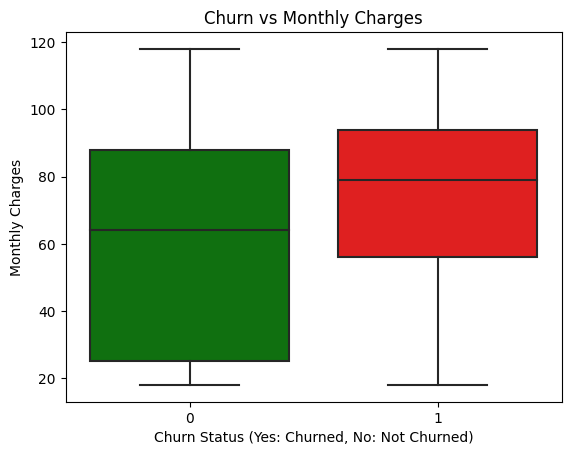

In [35]:
sns.boxplot(x="churn", y="monthly_charges", data=df, palette={1: "r", 0: "g"})
plt.title('Churn vs Monthly Charges')
plt.xlabel('Churn Status (Yes: Churned, No: Not Churned)')
plt.ylabel('Monthly Charges')
plt.show()

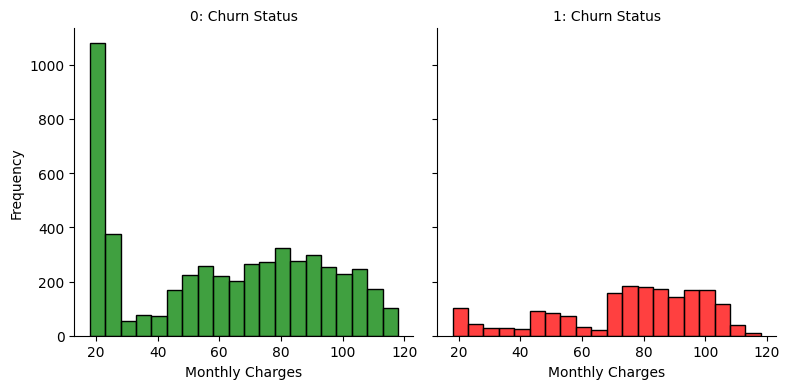

In [36]:
palette = {0: "g", 1: "r"}

g = sns.FacetGrid(df, col="churn", height=4, aspect=1, hue="churn", palette=palette)
g.map(sns.histplot, "monthly_charges", bins=20, edgecolor='black')
g.set_axis_labels('Monthly Charges', 'Frequency')
g.set_titles(col_template="{col_name}: Churn Status")
plt.show()
# churn status 1 = Churned customer
#churn status 0 = non-churned customer

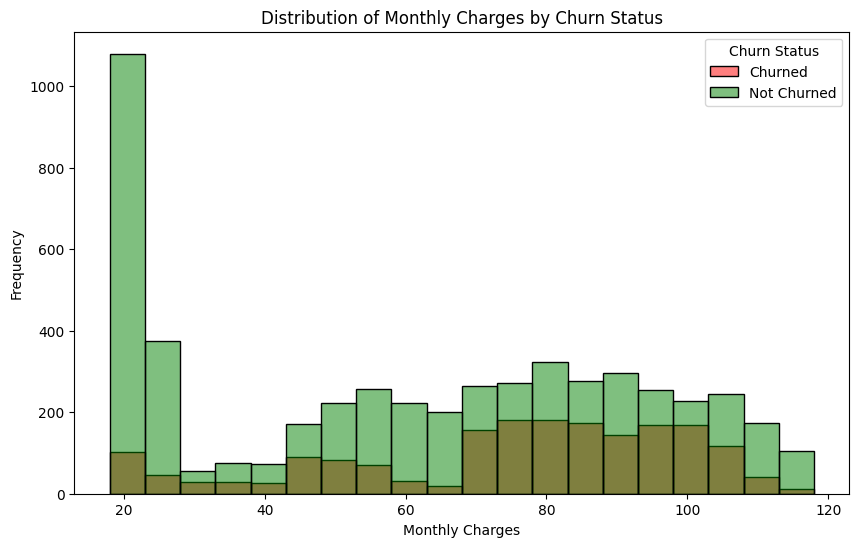

In [37]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="monthly_charges", hue="churn", bins=20, kde=False, edgecolor='black', palette={0: 'g', 1: 'r'})
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Churned', 'Not Churned'])
plt.show()

#### TENURE

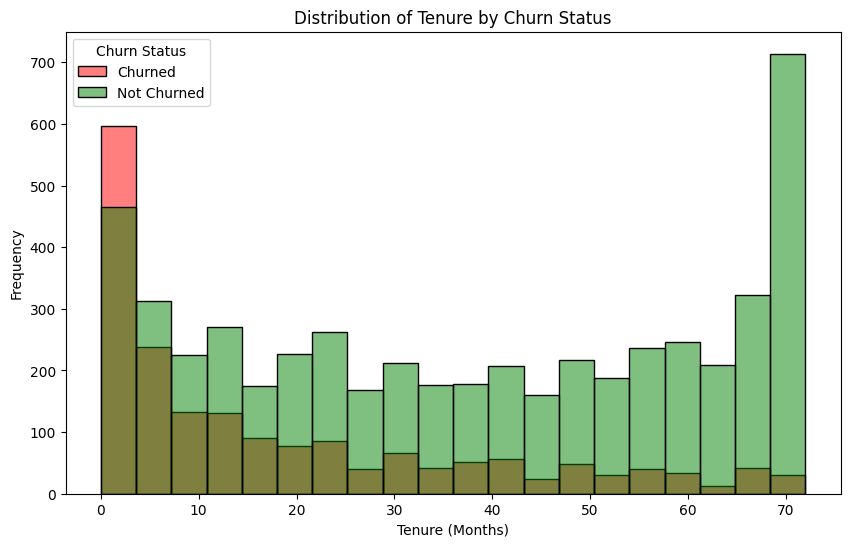

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="tenure", hue="churn", bins=20, kde=False, edgecolor='black', palette={0: 'g', 1: 'r'})
plt.title('Distribution of Tenure by Churn Status')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.legend(title='Churn Status', labels=['Churned', 'Not Churned'])
plt.show()


- Hhighest churn rate in customers who joined within 5 months. 
- Lowest churn rates in Customer who paying around $20 per month ie. prepay or rollover plans


#### CONTRACT TYPES

In [39]:
unique_contract_types = df['contract_type'].unique()
print(unique_contract_types)

[0 1 2]


In [40]:
contract_type_counts = df['contract_type'].value_counts()
print(contract_type_counts)

contract_type
0    3875
2    1694
1    1471
Name: count, dtype: int64


In [41]:
#0 = month-to-month
#1 = one-year
#2 = two-year

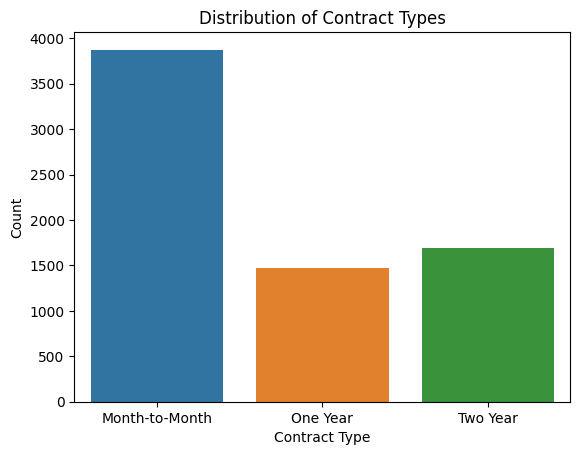

In [42]:
# Create the bar plot
sns.countplot(x='contract_type', data=df)

# Set the title and labels
plt.title('Distribution of Contract Types')
plt.xlabel('Contract Type')
plt.ylabel('Count')

# Set the x-axis labels
plt.xticks(ticks=[0, 1, 2], labels=['Month-to-Month', 'One Year', 'Two Year'])

# Show the plot
plt.show()

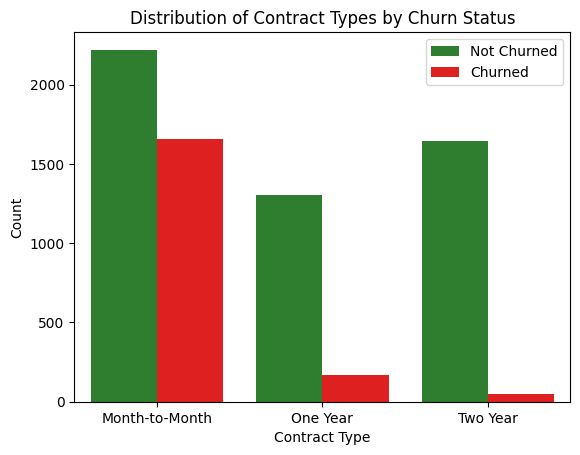

In [43]:
# Define the colors for the churn categories
churn_colors = ["forestgreen", "red"]

# Create the bar plot with hue='Churn' and specified colors
ax = sns.countplot(x='contract_type', hue='churn', data=df, palette=churn_colors)

# Set the title and labels
ax.set_title('Distribution of Contract Types by Churn Status')
ax.set_xlabel('Contract Type')
ax.set_ylabel('Count')

# Set the x-axis labels
ax.set_xticklabels(['Month-to-Month', 'One Year', 'Two Year'])

# Get the legend and change the labels
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Not Churned', 'Churned'])

# Show the plot
plt.show()


- Evidence from graphs reveals that contract types and payment methods are substantial indicators of customer churn
- Key facts including over 50% of customers on month-to-month payment plans.
- Highest churn rate for Customers not bonded by contract.


#### Tenure Segment

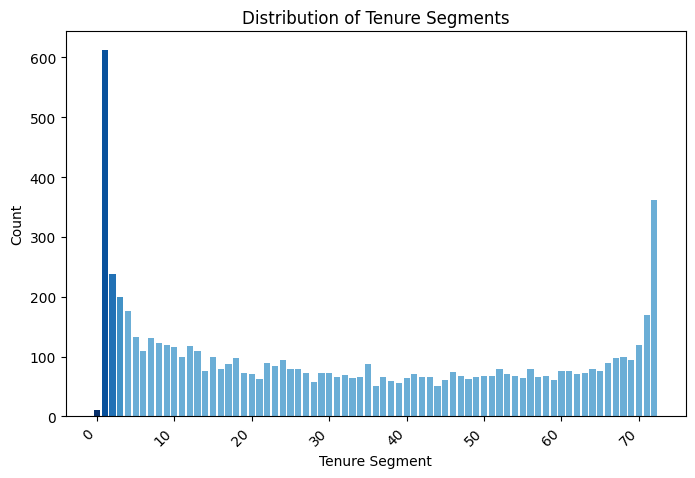

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Assuming you have already loaded and preprocessed your DataFrame 'df'

# Calculate the count of each tenure segment
tenure_counts = df['tenure'].value_counts()

# Sort the tenure segments based on their counts
sorted_tenure_segments = tenure_counts.sort_index()

# Define a custom colormap with darker shades of blue
colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6']
custom_cmap = ListedColormap(colors, name='custom_cmap')

# Create a bar plot with the custom colormap
plt.figure(figsize=(8, 5))
plt.bar(sorted_tenure_segments.index, sorted_tenure_segments.values, color=custom_cmap(range(len(sorted_tenure_segments))))
plt.xlabel('Tenure Segment')
plt.ylabel('Count')
plt.title('Distribution of Tenure Segments')
plt.xticks(rotation=45, ha='right')
plt.show()


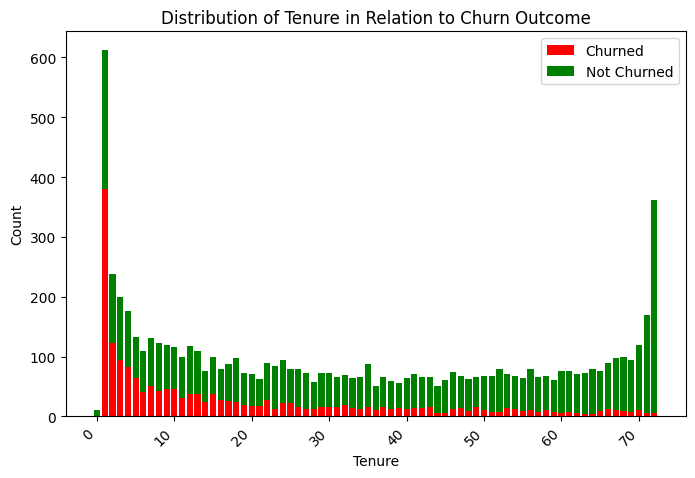

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded and preprocessed your DataFrame 'df'

# Calculate the count of each tenure segment for both churned and not churned customers
tenure_counts_churned = df[df['churn'] == 1]['tenure'].value_counts()
tenure_counts_not_churned = df[df['churn'] == 0]['tenure'].value_counts()

# Sort the tenure segments based on their counts
sorted_tenure_segments = tenure_counts_churned.add(tenure_counts_not_churned, fill_value=0).sort_index()

# Define colors for churned (red) and not churned (forest green) customers
churned_color = 'r'  # Red color
not_churned_color = 'g'  # Forest green color

# Create a bar plot with the custom colors (stacked bars for churned and not churned customers)
plt.figure(figsize=(8, 5))
churned_bars = plt.bar(sorted_tenure_segments.index, tenure_counts_churned.reindex(sorted_tenure_segments.index, fill_value=0), color=churned_color, label='Churned')
not_churned_bars = plt.bar(sorted_tenure_segments.index, tenure_counts_not_churned.reindex(sorted_tenure_segments.index, fill_value=0), color=not_churned_color, bottom=tenure_counts_churned.reindex(sorted_tenure_segments.index, fill_value=0), label='Not Churned')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Distribution of Tenure in Relation to Churn Outcome')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()


In [46]:
tenure_counts = df['tenure'].value_counts().reset_index()
print(tenure_counts)

    tenure  count
0        1    613
1       72    361
2        2    238
3        3    200
4        4    176
..     ...    ...
68      28     57
69      39     56
70      44     51
71      36     50
72       0     11

[73 rows x 2 columns]


Large body count of new customers within 12 months, indicating company business stable growth

#### Contract Types

In [47]:
contract_counts = df['contract_type'].value_counts().reset_index()
print(contract_counts)

   contract_type  count
0              0   3875
1              2   1694
2              1   1471


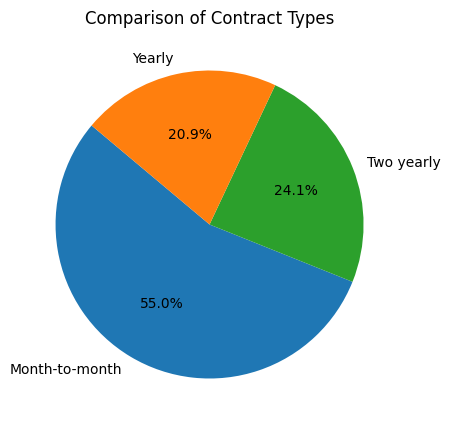

In [48]:
# Mapping subscription types to custom labels and colors
label_mapping = {0: 'Month-to-month', 1: 'Yearly', 2: 'Two yearly'}
color_mapping = {'Month-to-month': '#1f77b4', 'Yearly': '#ff7f0e', 'Two yearly': '#2ca02c'}

# Calculating the percentage of each subscription type
contract_type_percents = df['contract_type'].value_counts(normalize=True) * 100

# Creating pie chart
plt.figure(figsize=(8, 5))
patches, texts, autotexts = plt.pie(contract_type_percents, labels=[label_mapping.get(x) for x in contract_type_percents.index], autopct='%1.1f%%', startangle=140, colors=[color_mapping.get(label_mapping.get(x)) for x in contract_type_percents.index])

for text in texts:
    text.set_color('black')

# Adding percentage labels inside each piece
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Comparison of Contract Types')
plt.show()

Evidence from graphs reveals that contract types and payment methods are substantial indicators of customer churn

#### INTERNET SERVICE TYPE

In [49]:
internet_service_counts = df['internet_service'].value_counts().reset_index()
print(internet_service_counts)


   internet_service  count
0                 1   3095
1                 0   2420
2                 2   1525


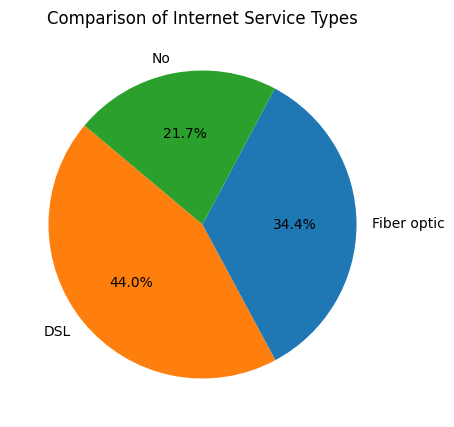

In [50]:


# Mapping internet service types to custom labels and colors
label_mapping = {0: 'Fiber optic', 1: 'DSL', 2: 'No'}
color_mapping = {'Fiber optic': '#1f77b4', 'DSL': '#ff7f0e', 'No': '#2ca02c'}

# Grouping by 'internet_service' and calculating the count for each category
internet_service_counts = df['internet_service'].value_counts()

# Calculating the percentage of each internet service type
internet_service_percents = (internet_service_counts / internet_service_counts.sum()) * 100

# Creating pie chart
plt.figure(figsize=(8, 5))
patches, texts, autotexts = plt.pie(internet_service_percents, labels=[label_mapping.get(x) for x in internet_service_percents.index], autopct='%1.1f%%', startangle=140, colors=[color_mapping.get(label_mapping.get(x)) for x in internet_service_percents.index])

for text in texts:
    text.set_color('black')

# Adding percentage labels inside each piece
for autotext in autotexts:
    autotext.set_color('black')

plt.title('Comparison of Internet Service Types')
plt.show()


In the Telco Churn dataset, the 'internet_service' column typically has three categories: 'DSL', 'Fiber optic', and 'No'. The 'No' category in this context represents customers who do not have an internet service subscription with the company.

This could be part of a bundled service where customers might have other services like phone or TV subscriptions but have chosen not to take the internet service from the same provider. Analyzing this category can be valuable in understanding the churn rate and preferences of customers who don't use the internet service but may be using other services from the company.

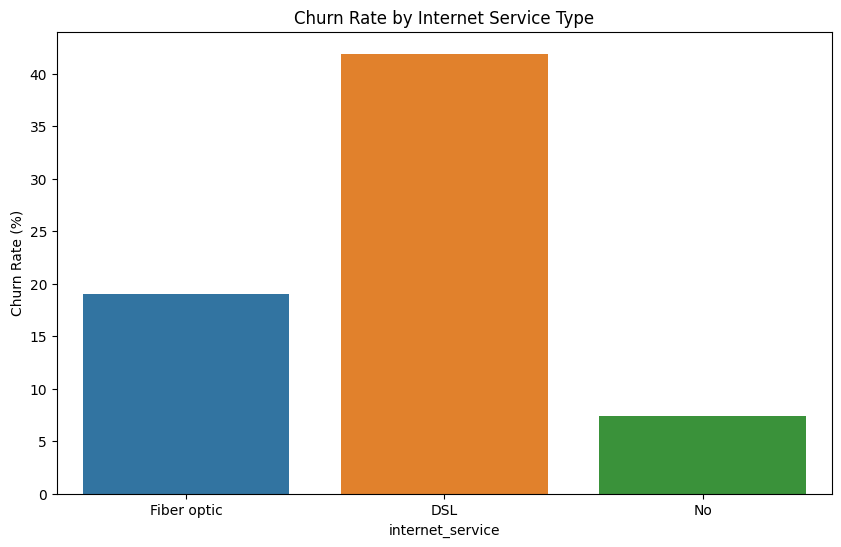

In [51]:
internet_service_churn_rate = df.groupby('internet_service')['churn'].apply(lambda x: (x == 1).mean()) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=internet_service_churn_rate.index, y=internet_service_churn_rate.values)
plt.title('Churn Rate by Internet Service Type')
plt.ylabel('Churn Rate (%)')

# Set the x-labels
labels = ['Fiber optic', 'DSL', 'No']
plt.xticks(range(len(labels)), labels)

plt.show()


- churn rates for DSL is largest
- this might indicate several things:
1) Quality of Service: The customers might be dissatisfied with the quality of the DSL service. This could be due to factors like slow internet speed, high downtime, or other technical issues.

2) Competitor Services: It could also be that competitors are providing better options than DSL, such as fiber optic services, which are generally faster and more reliable. This could cause customers to switch to those services, increasing the churn rate for DSL.

3) Price: The pricing of the DSL service could be another factor. If the cost is not justified by the service quality, customers might prefer to switch to a better or cheaper option.

4) Customer Support: Poor customer service can also lead to a higher churn rate. If customers' issues are not resolved promptly or adequately, they may choose to terminate their services.

#### SUPPORT

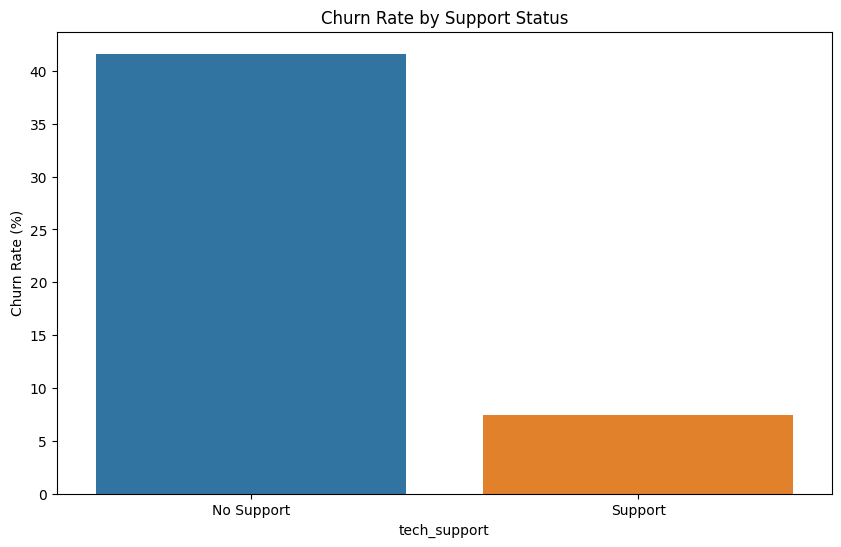

In [52]:
# Calculate the churn rate for customers with and without tech support
support_churn_rate = df.groupby('tech_support')['churn'].apply(lambda x: (x == 1).mean()) * 100

# Rename the index for clarity in visualization
support_churn_rate.index = support_churn_rate.index.map({0: 'No Support', 1: 'Support'})

plt.figure(figsize=(10, 6))
sns.barplot(x=support_churn_rate.index, y=support_churn_rate.values)
plt.title('Churn Rate by Support Status')
plt.ylabel('Churn Rate (%)')
plt.show()


Majority of people that have churned do not o use tech support 

#### Payment Method

In [53]:
df['payment_method']

0       2
1       3
2       3
4       2
5       2
       ..
7040    3
7041    1
7042    2
7043    3
7044    0
Name: payment_method, Length: 7040, dtype: int64

In [54]:
#'Bank transfer (automatic)' would be encoded as 0
#'Credit card (automatic)' would be encoded as 1
#'Electronic check' would be encoded as 2
#'Mailed check' would be encoded as 3

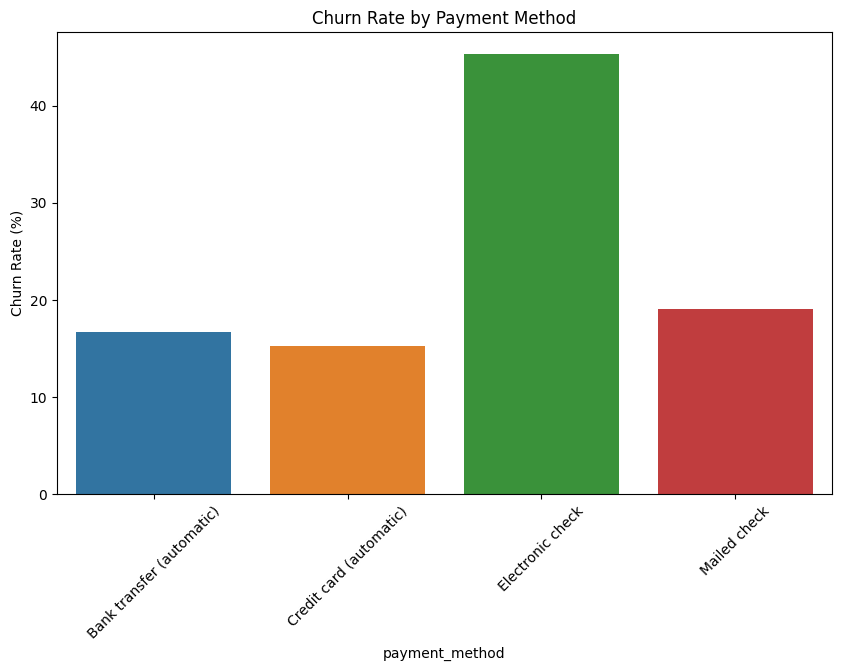

In [55]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Define the mapping from encoded values to original labels
payment_method_dict = {0: 'Bank transfer (automatic)', 
                       1: 'Credit card (automatic)', 
                       2: 'Electronic check', 
                       3: 'Mailed check'}

# Replace the encoded 'payment_method' column with original categories
df_copy['payment_method'] = df_copy['payment_method'].map(payment_method_dict)

# Calculate the churn rate for each payment method
payment_method_churn_rate = df_copy.groupby('payment_method')['churn'].apply(lambda x: (x == 1).mean()) * 100

plt.figure(figsize=(10, 6))

sns.barplot(x=payment_method_churn_rate.index, y=payment_method_churn_rate.values)

# Set the title and labels
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate (%)')

# Set the x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()



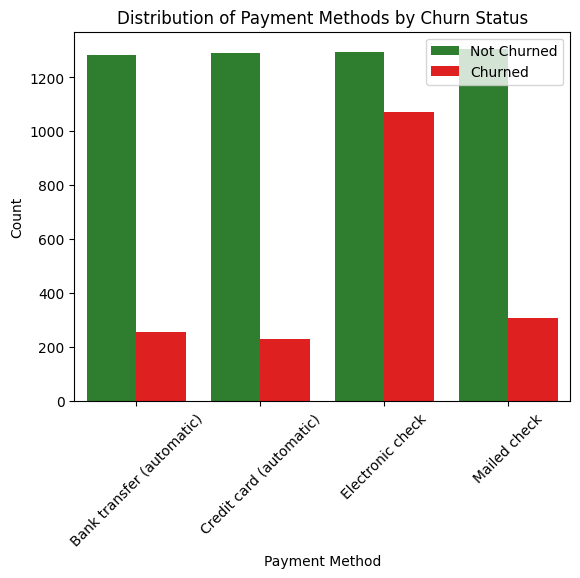

In [56]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Define the mapping from encoded values to original labels
payment_method_dict = {0: 'Bank transfer (automatic)', 
                       1: 'Credit card (automatic)', 
                       2: 'Electronic check', 
                       3: 'Mailed check'}

# Replace the encoded 'payment_method' column with original categories
df_copy['payment_method'] = df_copy['payment_method'].map(payment_method_dict)

# Calculate the counts for each category in 'payment_method' split by 'churn'
churn_counts = df_copy.groupby(['payment_method', 'churn']).size().reset_index(name='counts')

# Create the colors for the churn categories
churn_colors = ["forestgreen", "red"]

# Create the bar plot
ax = sns.barplot(x='payment_method', y='counts', hue='churn', data=churn_counts, palette=churn_colors)

# Set the title and labels
ax.set_title('Distribution of Payment Methods by Churn Status')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')

# Set the x-axis labels
ax.set_xticklabels(['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'])

# Get the legend and change the labels
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Not Churned', 'Churned'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [57]:
# Create a DataFrame with the count of churn and non-churn for each payment method
churn_counts = df.groupby(['payment_method', 'churn']).size().reset_index(name='counts')

# Print out the DataFrame
print(churn_counts)


   payment_method  churn  counts
0               0      0    1283
1               0      1     258
2               1      0    1290
3               1      1     232
4               2      0    1294
5               2      1    1071
6               3      0    1304
7               3      1     308


Payment by electronic check shows the highest churn rate


In [58]:
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,820,1


In [59]:
# Segment the data
senior_citizens_echeck = df[(df['senior_citizen'] == '1') & (df['payment_method'] == 'Electronic check')]

# Calculate the churn rate
churn_rate = (senior_citizens_echeck['churn'] == 1).mean()

print(f'The churn rate among senior citizens using electronic check is {churn_rate*100:.2f}%')


The churn rate among senior citizens using electronic check is nan%


In [60]:
# Define the different payment methods (replace with your actual encodings)
payment_methods = [0, 1, 2, 3]

for method in payment_methods:
    # Segment the data
    senior_citizens_method = df[(df['senior_citizen'] == 1) & (df['payment_method'] == method)]

    # Calculate the churn rate
    churn_rate = (senior_citizens_method['churn'] == 1).mean()

    print(f'The churn rate among senior citizens using {method} is {churn_rate*100:.2f}%')


The churn rate among senior citizens using 0 is 22.75%
The churn rate among senior citizens using 1 is 28.05%
The churn rate among senior citizens using 2 is 53.37%
The churn rate among senior citizens using 3 is 46.81%


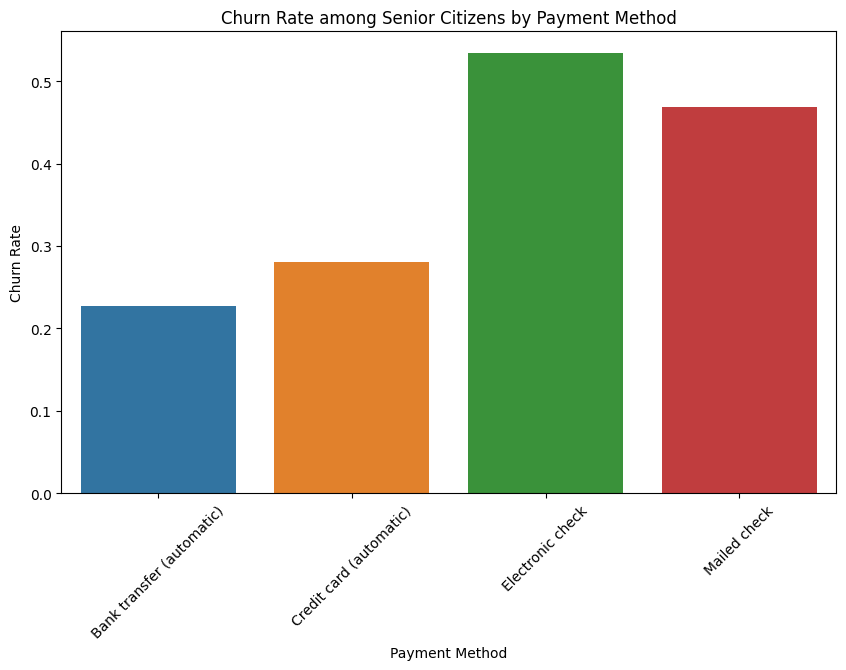

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the different payment methods and their labels
payment_methods = [0, 1, 2, 3]
payment_method_labels = ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check']

# Initialize an empty dictionary to store the churn rates
churn_rates = {}

for method in payment_methods:
    # Segment the data
    senior_citizens_method = df[(df['senior_citizen'] == 1) & (df['payment_method'] == method)]

    # Calculate the churn rate
    churn_rate = (senior_citizens_method['churn'] == 1).mean()

    # Store the churn rate in the dictionary
    churn_rates[method] = churn_rate

# Convert the dictionary into a pandas DataFrame
churn_rates_df = pd.DataFrame(list(churn_rates.items()), columns=['payment_method', 'churn_rate'])

# Plot the churn rates
plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method', y='churn_rate', data=churn_rates_df)
plt.title('Churn Rate among Senior Citizens by Payment Method')
plt.ylabel('Churn Rate')
plt.xlabel('Payment Method')

# Set the x-axis labels
plt.xticks(ticks=[0, 1, 2, 3], labels=payment_method_labels, rotation=45)

plt.show()


HIGHEST CHURN RATE BY PAYMENT METHOD: Customers paying by Echeck, especially apparent in the senior citizen group.


#### Senior Citizen

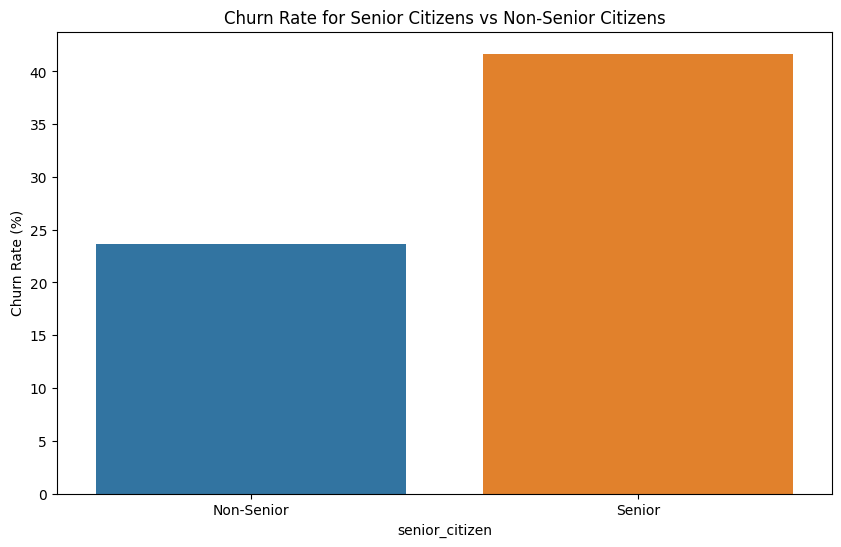

In [62]:
# Calculate the churn rate for senior citizens vs. non-senior citizens
senior_citizen_churn_rate = df.groupby('senior_citizen')['churn'].mean() * 100

plt.figure(figsize=(10, 6))
sns.barplot(x=senior_citizen_churn_rate.index, y=senior_citizen_churn_rate.values)
plt.title('Churn Rate for Senior Citizens vs Non-Senior Citizens')
plt.ylabel('Churn Rate (%)')
plt.xticks(ticks=[0, 1], labels=['Non-Senior', 'Senior'])
plt.show()


In [63]:
# the churn rate a senior citizens, appears higher that non-seniors, and interesting find. 
# this may be due to various factors with individuals that arent satisfied with the service for non tech-savvy senior citizens

Potential reasons for high churn rate in Senior-Citizens: 
1) Digital Literacy: Senior citizens may not be as digitally literate as younger generations. This could mean that they have more difficulty understanding and using the telecom services, which could lead to dissatisfaction and hence a higher churn rate.

2) Customer Service Experience: Senior citizens might require more assistance in managing their telecom services. If the customer service isn't adequately equipped to handle these requirements, it could lead to frustration and churn.

3) Price Sensitivity: Senior citizens, especially those on fixed incomes, might be more price-sensitive. If they perceive the services as too expensive or not providing adequate value for the cost, they might decide to churn.

4) Service Requirements: The service requirements of senior citizens might be different from non-senior citizens. For example, they may not require a vast range of services or might prefer more straightforward plans. If the telecom company isn't providing suitable plans tailored for them, they might opt to switch to a different provider.

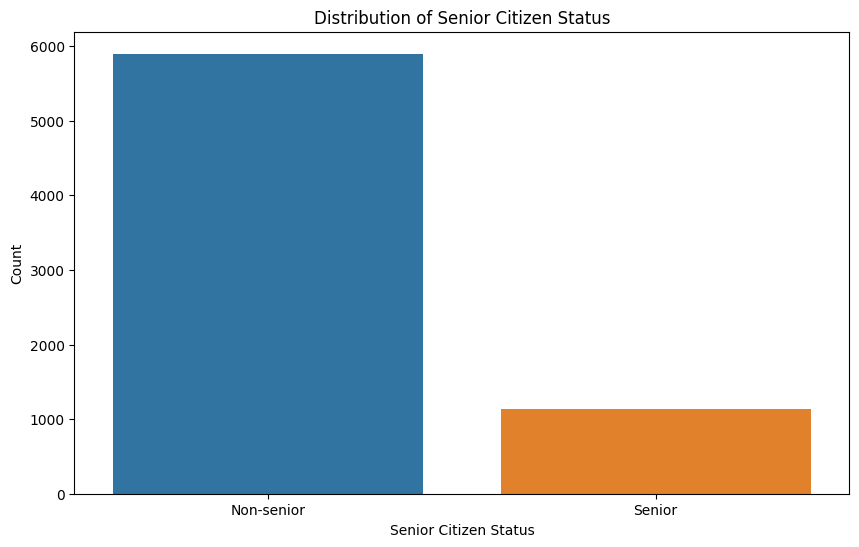

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each category
senior_citizen_counts = df['senior_citizen'].value_counts()

# Create a DataFrame from the counts
senior_citizen_df = pd.DataFrame({'senior_citizen': senior_citizen_counts.index, 'count': senior_citizen_counts.values})

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='senior_citizen', y='count', data=senior_citizen_df)

# Set the title and labels
plt.title('Distribution of Senior Citizen Status')
plt.xlabel('Senior Citizen Status')
plt.ylabel('Count')

# Set the x-axis labels
plt.xticks(ticks=[0, 1], labels=['Non-senior', 'Senior'])

# Show the plot
plt.show()



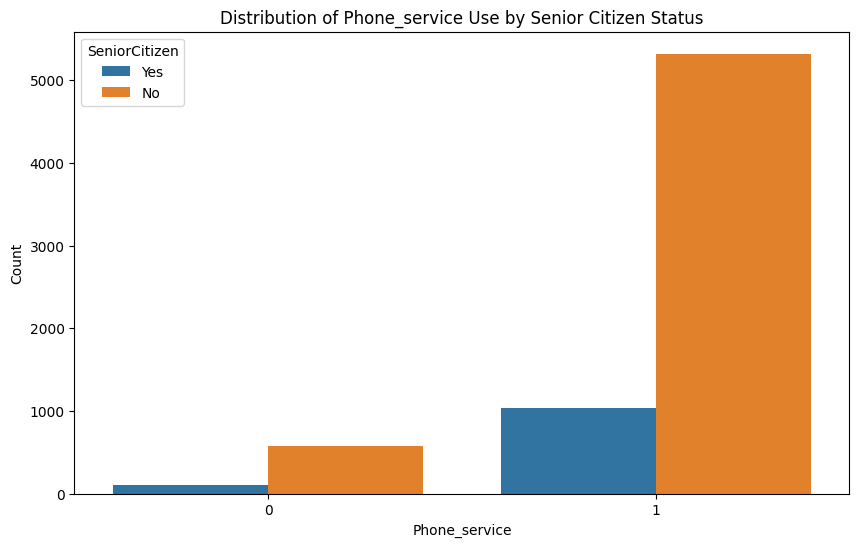

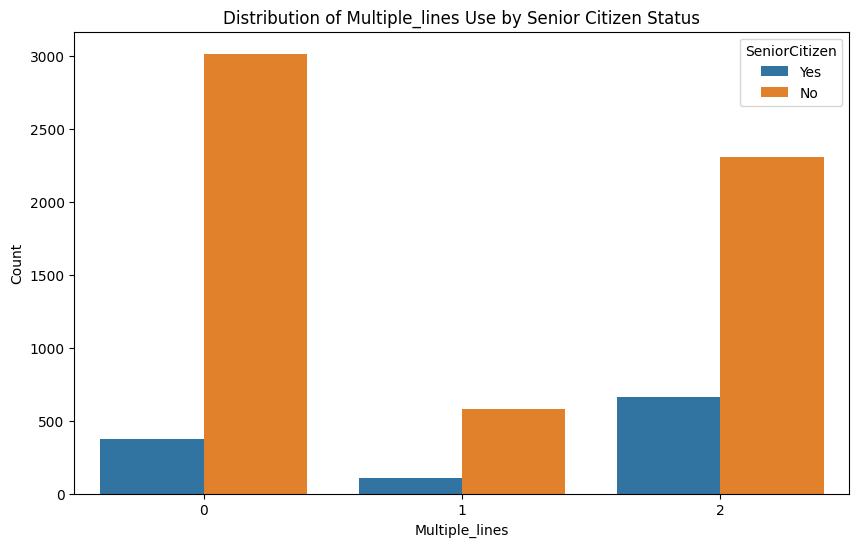

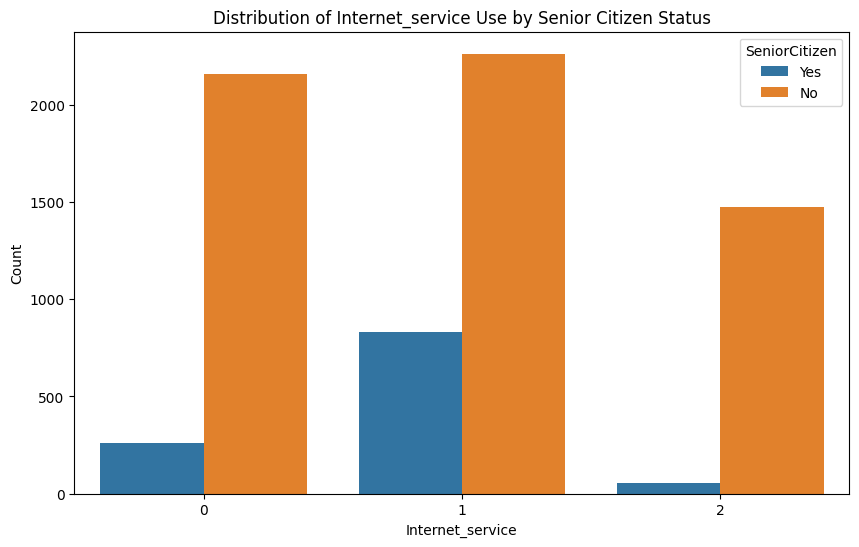

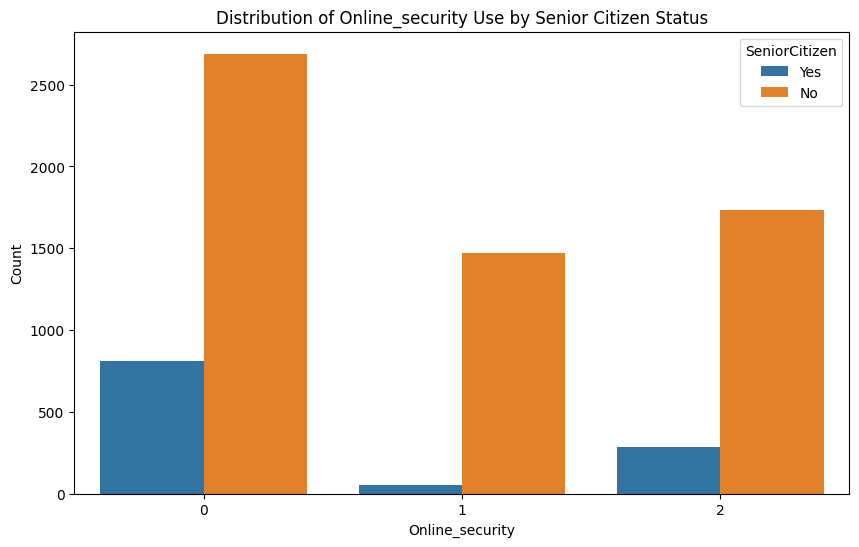

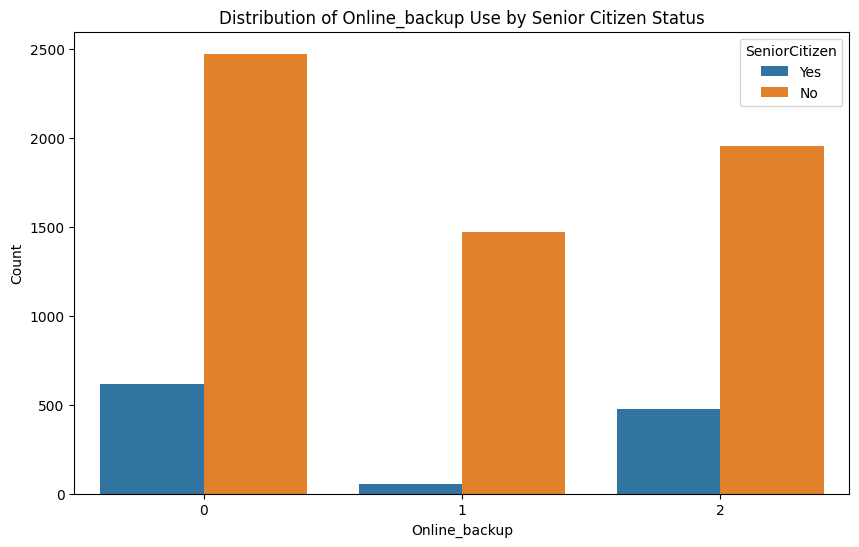

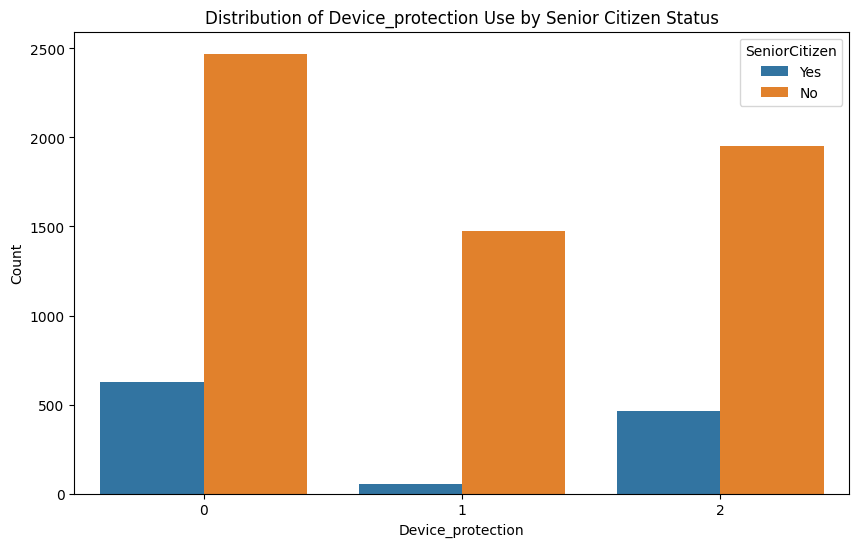

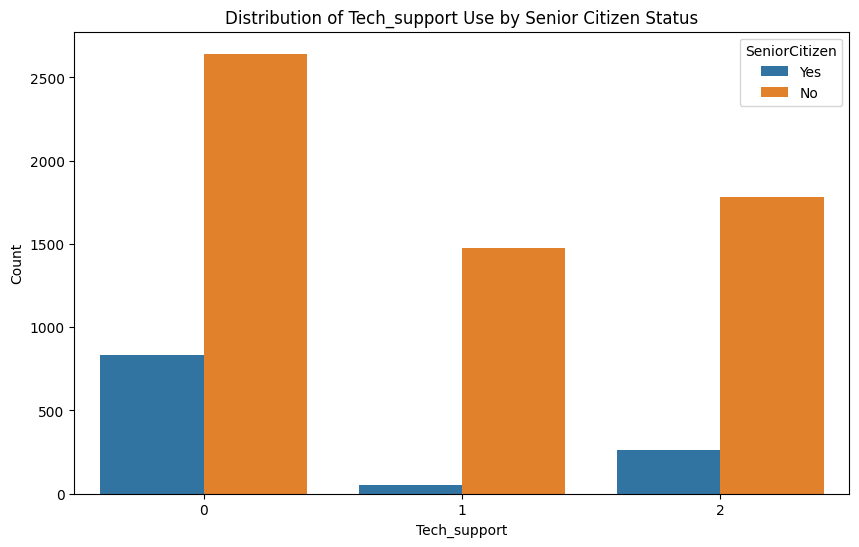

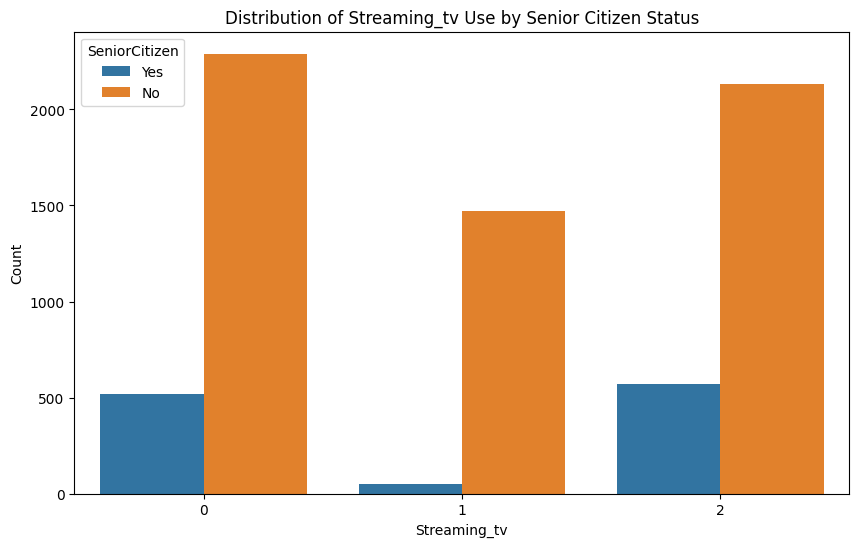

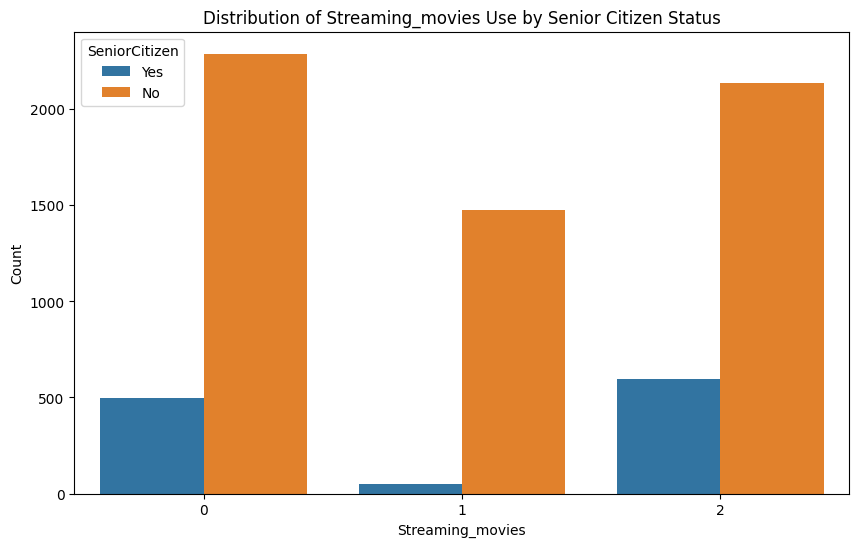

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of service-related features
services = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 
            'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Loop over each service
for service in services:
    # Create a subset of the data for senior and non-senior citizens
    df_senior = df[df['senior_citizen'] == 1]
    df_non_senior = df[df['senior_citizen'] == 0]

    # Count the occurrences of each type of service
    senior_service_counts = df_senior[service].value_counts()
    non_senior_service_counts = df_non_senior[service].value_counts()

    # Create a DataFrame from the counts
    senior_service_df = pd.DataFrame({'Service': senior_service_counts.index, 'Count': senior_service_counts.values, 'SeniorCitizen': 'Yes'})
    non_senior_service_df = pd.DataFrame({'Service': non_senior_service_counts.index, 'Count': non_senior_service_counts.values, 'SeniorCitizen': 'No'})

    # Concatenate the two DataFrames
    service_df = pd.concat([senior_service_df, non_senior_service_df])

    # Create the bar plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Service', y='Count', hue='SeniorCitizen', data=service_df)

    # Set the title and labels
    plt.title(f'Distribution of {service.capitalize()} Use by Senior Citizen Status')
    plt.xlabel(service.capitalize())
    plt.ylabel('Count')

    # Show the plot
    plt.show()


In [66]:
# Cross-tabulation
cross_tab = pd.crosstab(index=[df['senior_citizen'], df['tech_support']], columns=df['churn'])

# Calculate the churn rates
cross_tab['Churn Rate (%)'] = cross_tab[1] / (cross_tab[0] + cross_tab[1]) * 100

print(cross_tab)



churn                           0     1  Churn Rate (%)
senior_citizen tech_support                            
0              0             1617  1026       38.819523
               1             1365   108        7.331976
               2             1523   259       14.534231
1              0              410   420       50.602410
               1               47     5        9.615385
               2              209    51       19.615385


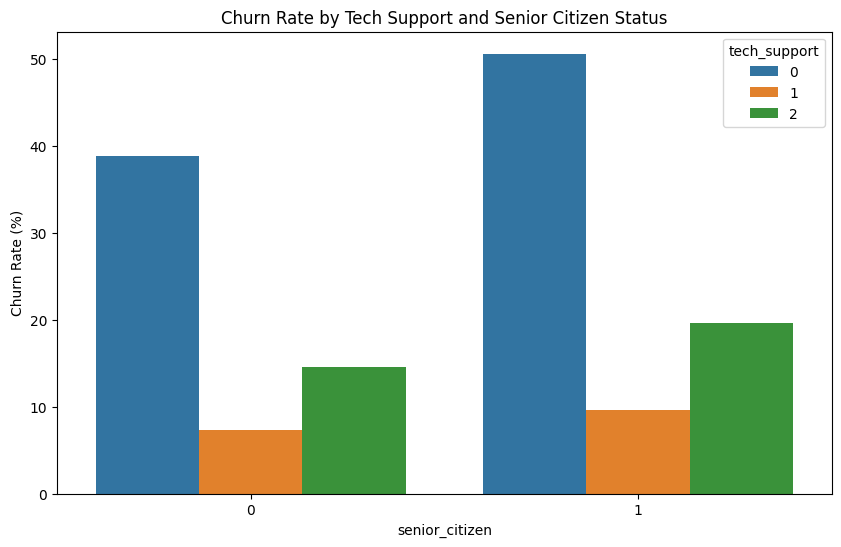

In [67]:
# Convert the cross-tabulation to a dataframe for easier plotting
df_cross_tab = cross_tab.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_cross_tab, x='senior_citizen', y='Churn Rate (%)', hue='tech_support')
plt.title('Churn Rate by Tech Support and Senior Citizen Status')
plt.ylabel('Churn Rate (%)')
plt.show()


#### Additional Services

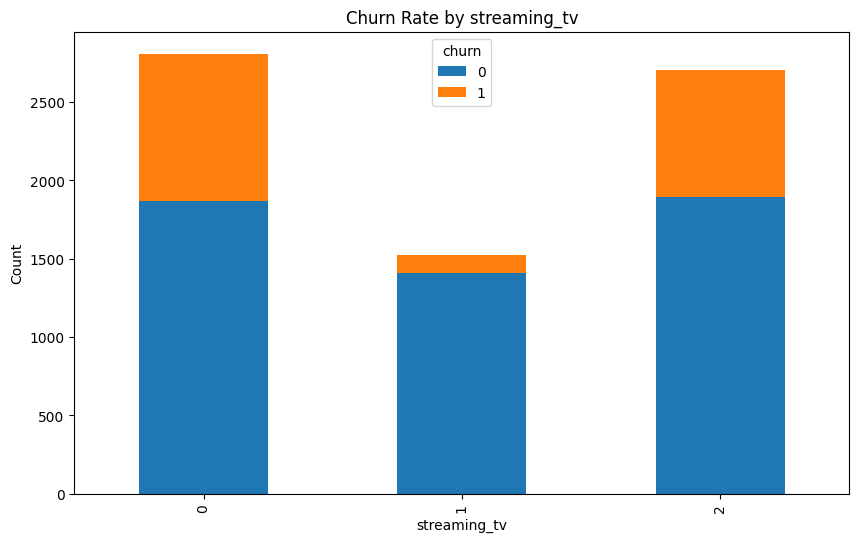

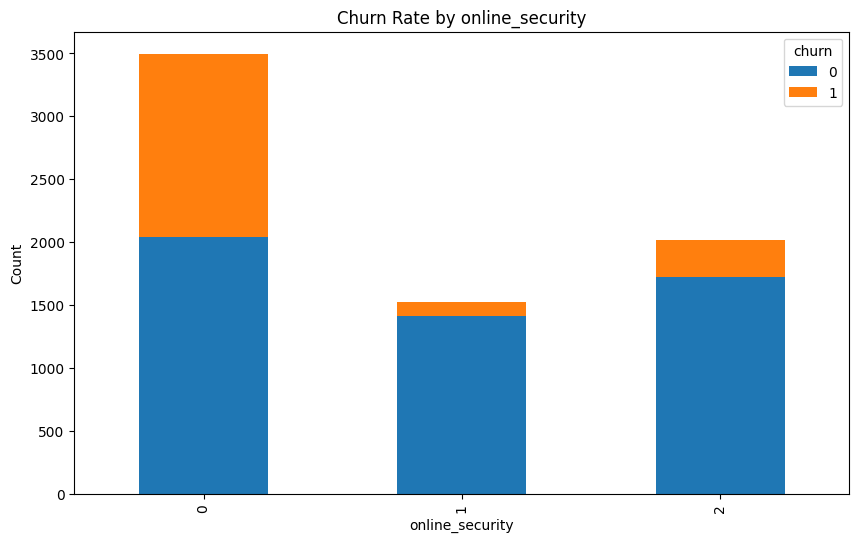

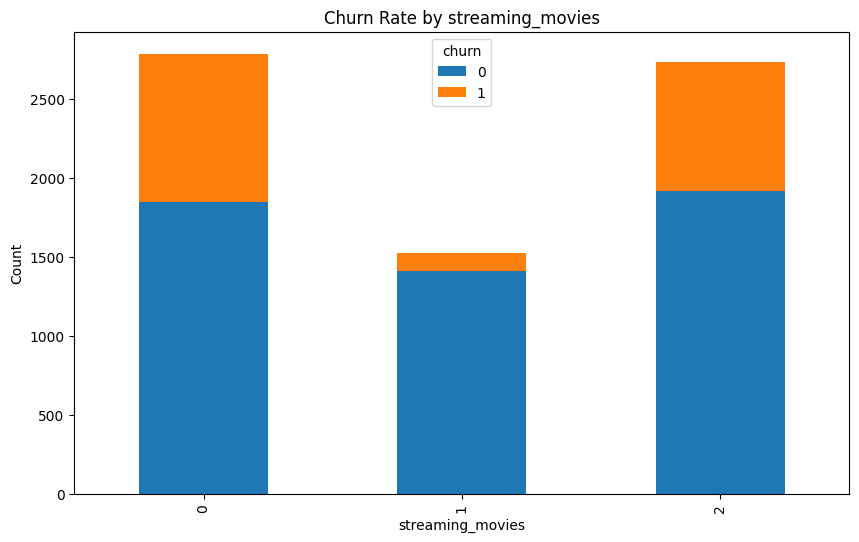

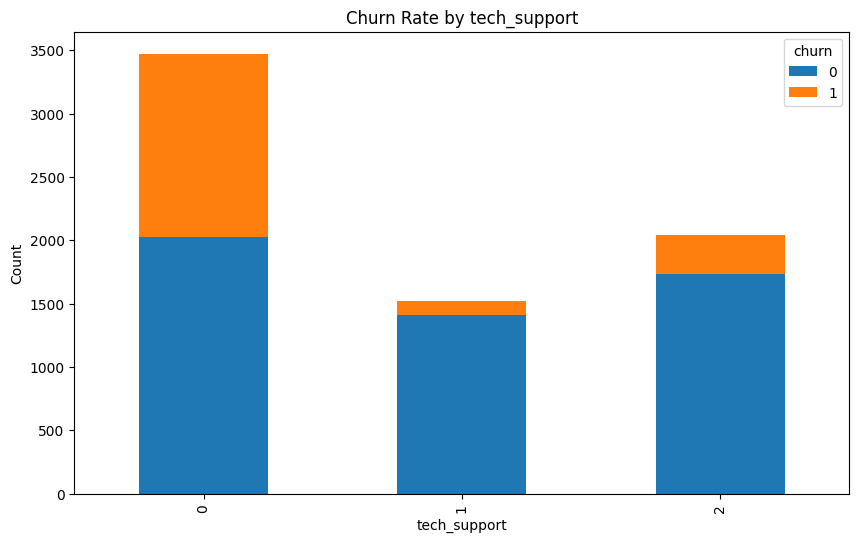

In [68]:
additional_services = ['streaming_tv', 'online_security', 'streaming_movies', 'tech_support']  # Add other services as needed

for service in additional_services:
    df_grouped = df.groupby([service, 'churn']).size().unstack().fillna(0)
    df_grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Churn Rate by {service}')
    plt.ylabel('Count')
    plt.show()


In [69]:
# List of service-related features
services = ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 
            'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']

# Initialize an empty DataFrame to store the counts
counts_df = pd.DataFrame()

# Loop over each service
for service in services:
    # Get counts of each type of service for senior and non-senior citizens
    senior_counts = df[df['senior_citizen'] == 1][service].value_counts()
    non_senior_counts = df[df['senior_citizen'] == 0][service].value_counts()

    # Convert these counts to DataFrames
    senior_counts_df = pd.DataFrame(senior_counts).reset_index()
    senior_counts_df.columns = ['Service', 'Count']
    senior_counts_df['SeniorCitizen'] = 'Yes'
    non_senior_counts_df = pd.DataFrame(non_senior_counts).reset_index()
    non_senior_counts_df.columns = ['Service', 'Count']
    non_senior_counts_df['SeniorCitizen'] = 'No'

    # Concatenate these DataFrames and add a column indicating the service type
    combined_df = pd.concat([senior_counts_df, non_senior_counts_df])
    combined_df['ServiceType'] = service

    # Append the counts to the main DataFrame
    counts_df = pd.concat([counts_df, combined_df])

# Print the counts
print(counts_df)


   Service  Count SeniorCitizen        ServiceType
0        1   1038           Yes      phone_service
1        0    104           Yes      phone_service
0        1   5322            No      phone_service
1        0    576            No      phone_service
0        2    665           Yes     multiple_lines
1        0    373           Yes     multiple_lines
2        1    104           Yes     multiple_lines
0        0   3016            No     multiple_lines
1        2   2305            No     multiple_lines
2        1    577            No     multiple_lines
0        1    831           Yes   internet_service
1        0    259           Yes   internet_service
2        2     52           Yes   internet_service
0        1   2264            No   internet_service
1        0   2161            No   internet_service
2        2   1473            No   internet_service
0        0    808           Yes    online_security
1        2    282           Yes    online_security
2        1     52           Yes

In [70]:
# Filter the data for senior citizens only
senior_data = df[df['senior_citizen'] == 1]

# Create a summary dataframe with the count of seniors using each service
summary = pd.DataFrame()

for column in df.columns:
    if column not in ['senior_citizen', 'gender', 'partner', 'dependents', 'tenure', 'contract_type', 
                      'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges', 
                      'churn', 'senior_tech_support', 'tenure_segment', 'age_segment', 'total_services', 
                      'average_monthly_charge']:
        service_count = senior_data[column].value_counts().reset_index()
        service_count.columns = ['ServiceType', 'Count']
        service_count['Service'] = column
        summary = pd.concat([summary, service_count])

# Reset the index of the summary dataframe
summary.reset_index(drop=True, inplace=True)

# Calculate the total number of senior citizens
total_seniors = senior_data.shape[0]

# Calculate the proportion of seniors using each service
summary['Proportion'] = summary['Count'] / total_seniors

# Display the data
print(summary)


    ServiceType  Count            Service  Proportion
0             1   1038      phone_service    0.908932
1             0    104      phone_service    0.091068
2             2    665     multiple_lines    0.582312
3             0    373     multiple_lines    0.326620
4             1    104     multiple_lines    0.091068
5             1    831   internet_service    0.727671
6             0    259   internet_service    0.226795
7             2     52   internet_service    0.045534
8             0    808    online_security    0.707531
9             2    282    online_security    0.246935
10            1     52    online_security    0.045534
11            0    614      online_backup    0.537653
12            2    476      online_backup    0.416813
13            1     52      online_backup    0.045534
14            0    624  device_protection    0.546410
15            2    466  device_protection    0.408056
16            1     52  device_protection    0.045534
17            0    830      

In [71]:
# Filter the data for senior citizens only
senior_data = df[df['senior_citizen'] == 1]

# Calculate the churn rate for each service among senior citizens
service_churn_rates = {}

for service in ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 
                'online_backup', 'device_protection', 'tech_support', 
                'streaming_tv', 'streaming_movies']:
    total_senior_users = len(senior_data[senior_data[service] == 1])
    churned_senior_users = len(senior_data[(senior_data[service] == 1) & (senior_data['churn'] == 1)])
    churn_rate = churned_senior_users / total_senior_users
    service_churn_rates[service] = churn_rate

# Find the service with the highest churn rate among senior citizens
most_likely_service = max(service_churn_rates, key=service_churn_rates.get)

print(f"For senior citizens, the service most likely to affect churn is {most_likely_service} with a churn rate of {service_churn_rates[most_likely_service]}")


For senior citizens, the service most likely to affect churn is internet_service with a churn rate of 0.4729241877256318


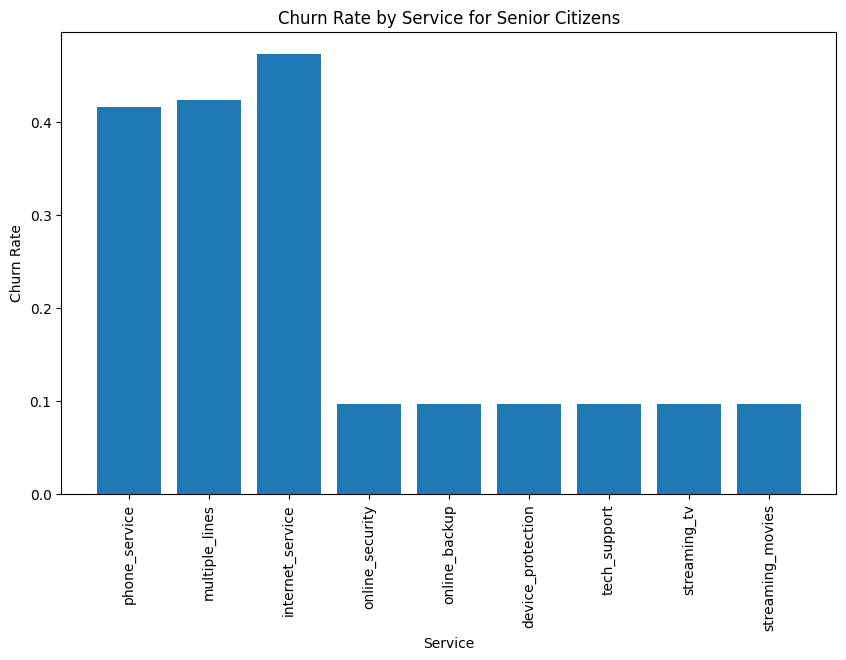

In [72]:
import matplotlib.pyplot as plt

# Create a bar plot of the churn rates
plt.figure(figsize=(10, 6))
plt.bar(service_churn_rates.keys(), service_churn_rates.values())
plt.xlabel('Service')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Service for Senior Citizens')
plt.xticks(rotation='vertical')  # Rotate x-axis labels for readability
plt.show()


#### MULTIPLE LINES

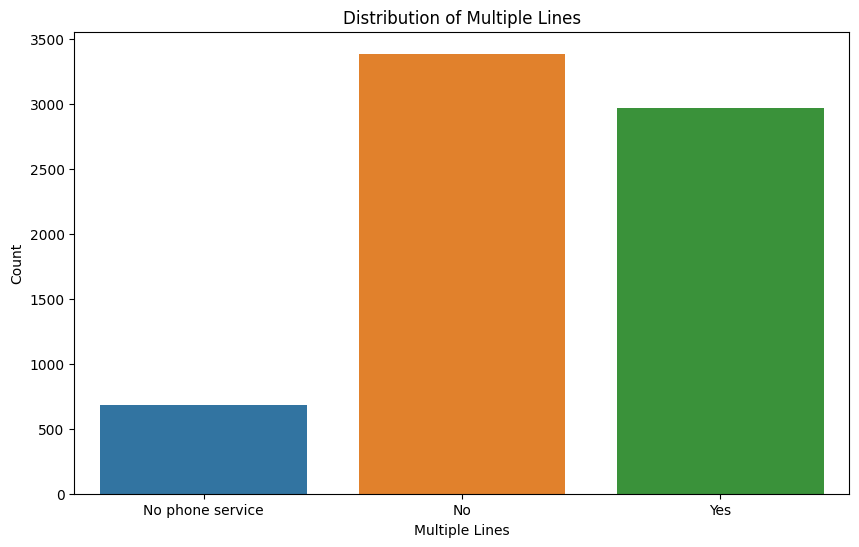

In [73]:
# Custom labels
multiple_lines_mapping = {0: 'No', 1: 'No phone service', 2: 'Yes'}

# Apply mapping to convert to custom labels
df['multiple_lines_label'] = df['multiple_lines'].map(multiple_lines_mapping)

plt.figure(figsize=(10, 6))
sns.countplot(x='multiple_lines_label', data=df)
plt.title('Distribution of Multiple Lines')
plt.ylabel('Count')
plt.xlabel('Multiple Lines')
plt.show()



Senior citizens only represent a small percentage of the total customer headcount, but compared to non senior citizens, they have a significant churn rate.


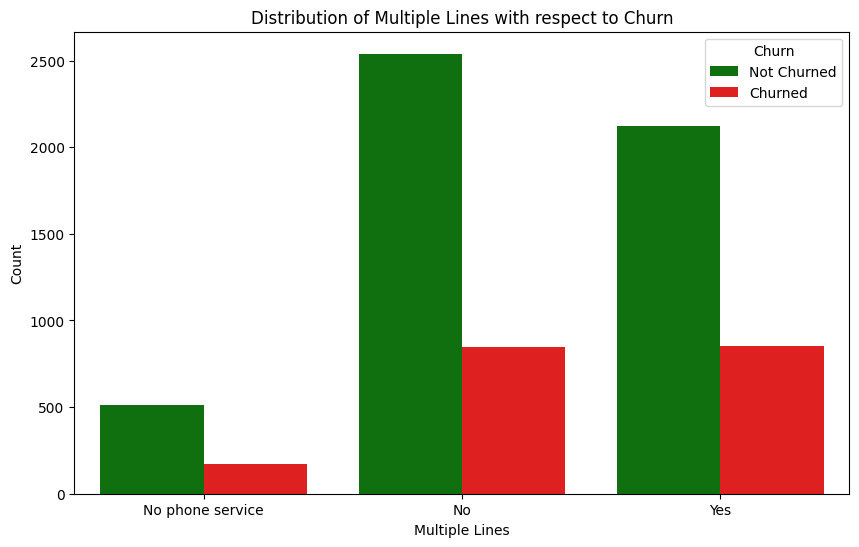

In [74]:
# Custom labels
multiple_lines_mapping = {0: 'No', 1: 'No phone service', 2: 'Yes'}

# Apply reverse mapping to convert encoded values back to labels
df['multiple_lines_label'] = df['multiple_lines'].map(multiple_lines_mapping)

# Now let's plot the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Custom color palette
palette = {0: "green", 1: "red"}

sns.countplot(x='multiple_lines_label', hue='churn', data=df, palette=palette)

# Custom legend
plt.legend(title='Churn', loc='upper right', labels=['Not Churned', 'Churned'])

plt.title('Distribution of Multiple Lines with respect to Churn')
plt.ylabel('Count')
plt.xlabel('Multiple Lines')
plt.show()



In [75]:
# Print out the value counts for each of the 'multiple_lines'
multiple_lines_counts = df['multiple_lines'].value_counts()

# Print the counts
print(multiple_lines_counts)


multiple_lines
0    3389
2    2970
1     681
Name: count, dtype: int64


In [76]:
# 0: 'No', 
# 1: 'No phone service', 
# 2: 'Yes'

#### Services

In [77]:
# Calculate the churn rate for each service
service_churn_rates = {}

for service in ['phone_service', 'multiple_lines', 'internet_service', 'online_security', 
                'online_backup', 'device_protection', 'tech_support', 
                'streaming_tv', 'streaming_movies']:
    total_users = len(df[df[service] == 1])
    churned_users = len(df[(df[service] == 1) & (df['churn'] == 1)])
    churn_rate = churned_users / total_users
    service_churn_rates[service] = churn_rate

# Find the service with the highest churn rate
most_likely_service = max(service_churn_rates, key=service_churn_rates.get)

print(f"The service most likely to affect churn is {most_likely_service} with a churn rate of {service_churn_rates[most_likely_service]}")


The service most likely to affect churn is internet_service with a churn rate of 0.41906300484652664


#### Gender

In [78]:
internet_service_counts = df['gender'].value_counts().reset_index()
print(internet_service_counts)
# 0 = Female
# 1 = Male

   gender  count
0       1   3552
1       0   3488


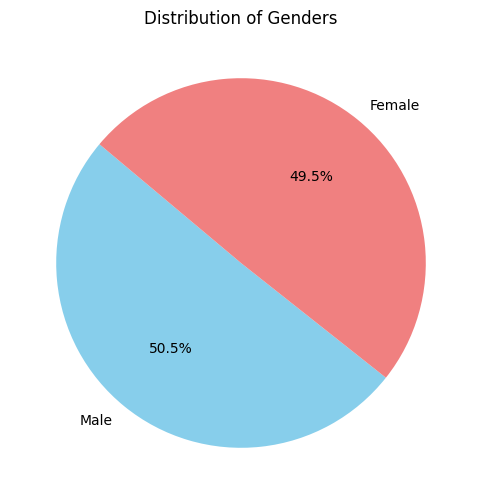

In [79]:
import matplotlib.pyplot as plt

# Map the gender values to custom labels
gender_mapping = {0: 'Female', 1: 'Male'}

# Convert the 'gender' column to custom labels
df['gender_label'] = df['gender'].map(gender_mapping)

# Calculate the counts of each gender
gender_counts = df['gender_label'].value_counts().reset_index()

# Rename the columns for clarity
gender_counts.columns = ['gender', 'count']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts['count'], labels=gender_counts['gender'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Genders')
plt.show()


In [80]:
# the ratio of genders in the df are virtually identical
# gender is balanced



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



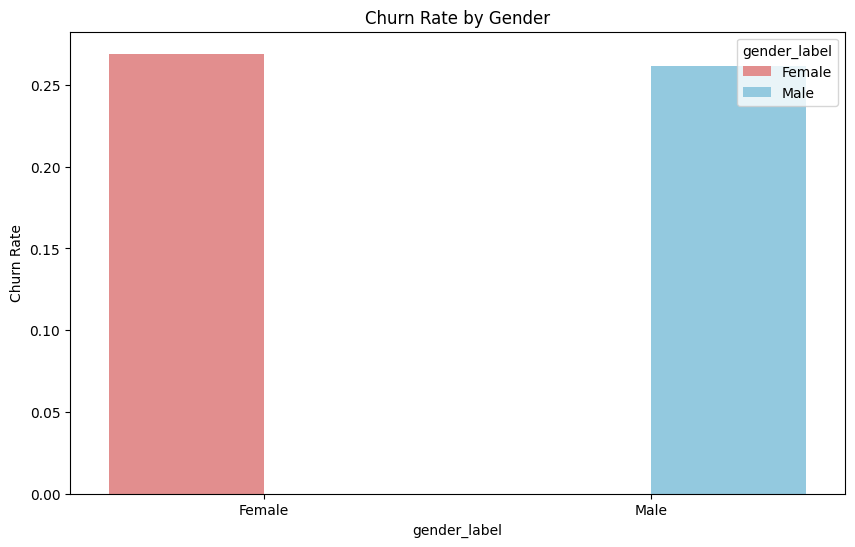

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Map the gender values to custom labels
gender_mapping = {0: 'Female', 1: 'Male'}

# Convert the 'gender' column to custom labels
df['gender_label'] = df['gender'].map(gender_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x="gender_label", y="churn", data=df, hue="gender_label", ci=None, palette={"Female": "lightcoral", "Male": "skyblue"})
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()



In [82]:
# there appears to be no relative factor that has an effect on the churn rate, based on gender

#### Partner / Dependent Status

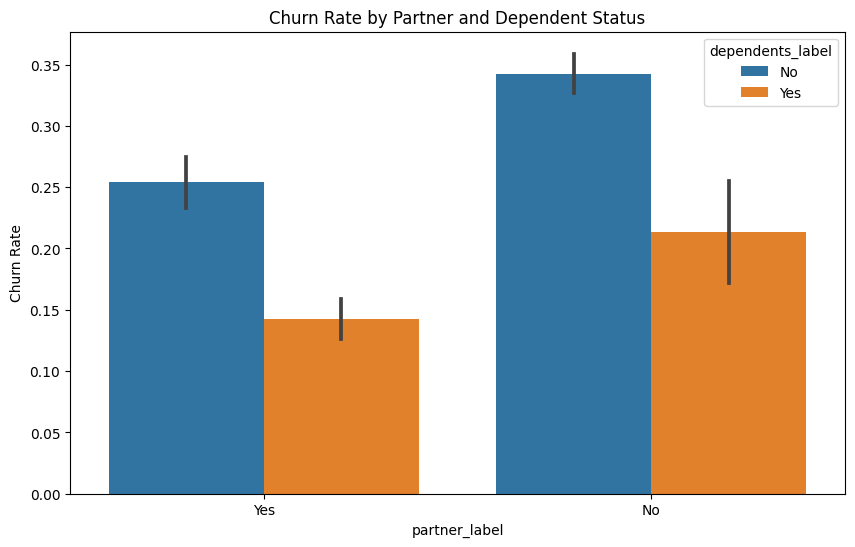

In [83]:

# Map the partner values to custom labels
partner_mapping = {0: 'No', 1: 'Yes'}

# Map the dependents values to custom labels
dependents_mapping = {0: 'No', 1: 'Yes'}

# Convert the 'partner' and 'dependents' columns to custom labels
df['partner_label'] = df['partner'].map(partner_mapping)
df['dependents_label'] = df['dependents'].map(dependents_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x="partner_label", y="churn", hue="dependents_label", data=df)
plt.title('Churn Rate by Partner and Dependent Status')
plt.ylabel('Churn Rate')
plt.show()

# 0 = no
# 1 = yes

In [84]:
# Calculate the churn rate for each combination of partner and dependent status
churn_rate = df.groupby(['partner_label', 'dependents_label'])['churn'].mean() * 100

# Print the results
print(churn_rate)


partner_label  dependents_label
No             No                  34.258694
               Yes                 21.329640
Yes            No                  25.408348
               Yes                 14.244851
Name: churn, dtype: float64


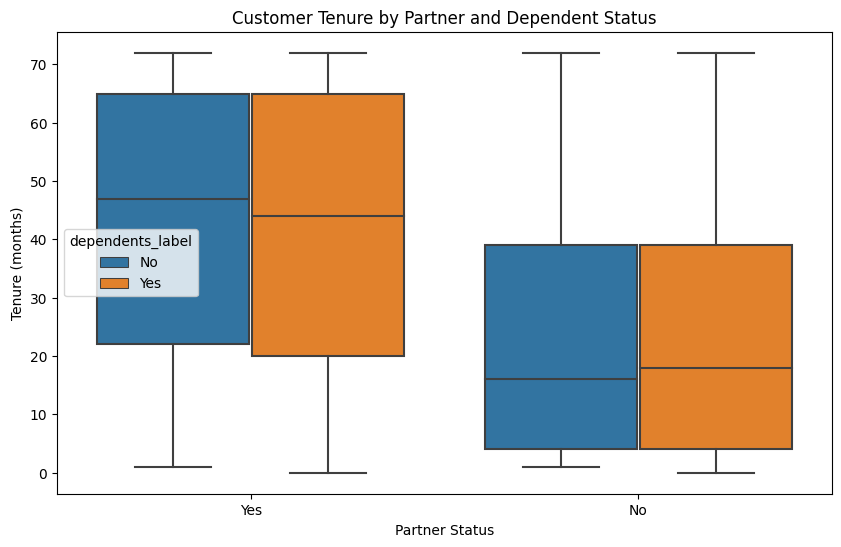

In [85]:
# tenure by partner and dependent status

plt.figure(figsize=(10, 6))
sns.boxplot(x='partner_label', y='tenure', hue='dependents_label', data=df)
plt.title('Customer Tenure by Partner and Dependent Status')
plt.xlabel('Partner Status')
plt.ylabel('Tenure (months)')
plt.show()


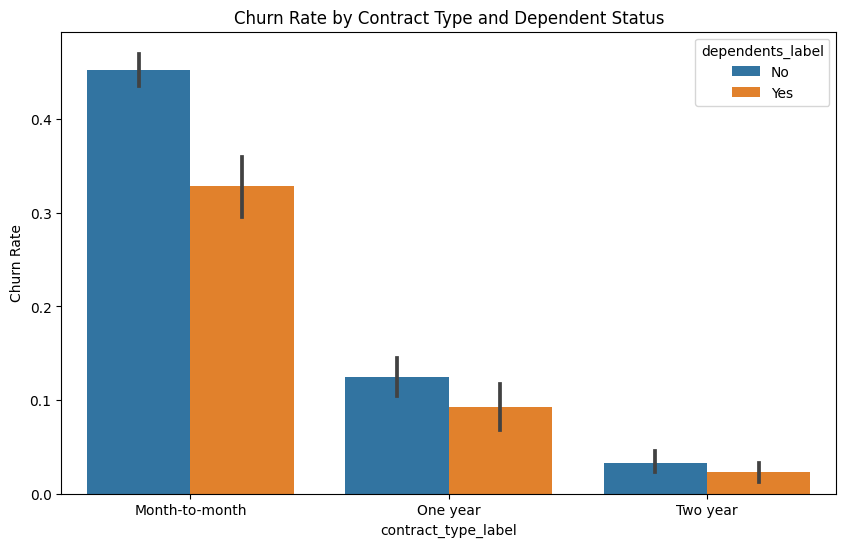

In [86]:
# churn by contract type and dependent status

# Map the contract_type values to custom labels
contract_type_mapping = {0: 'Month-to-month', 1: 'One year', 2: 'Two year'}
df['contract_type_label'] = df['contract_type'].map(contract_type_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x='contract_type_label', y='churn', hue='dependents_label', data=df)
plt.title('Churn Rate by Contract Type and Dependent Status')
plt.ylabel('Churn Rate')
plt.show()


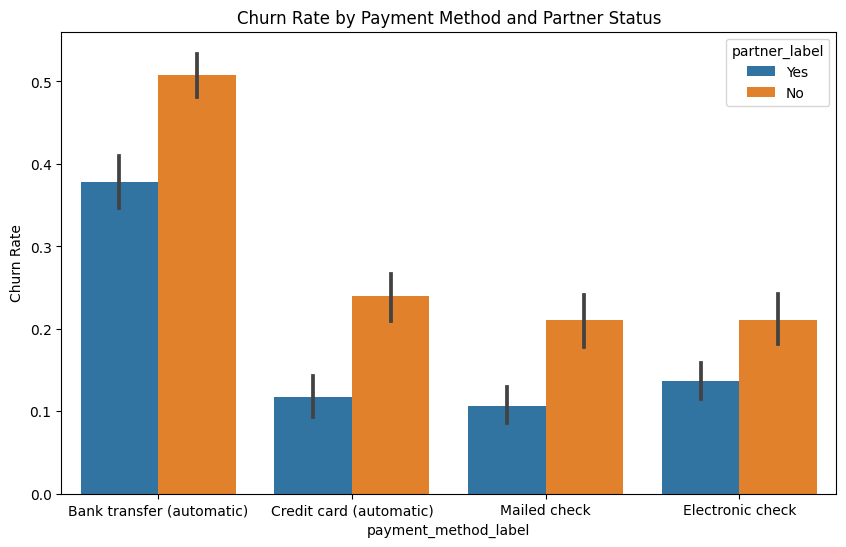

In [87]:
# churn by payment method and partner status
# Map the payment_method values to custom labels
payment_method_mapping = {0: 'Electronic check', 1: 'Mailed check', 2: 'Bank transfer (automatic)', 3: 'Credit card (automatic)'}
df['payment_method_label'] = df['payment_method'].map(payment_method_mapping)

plt.figure(figsize=(10, 6))
sns.barplot(x='payment_method_label', y='churn', hue='partner_label', data=df)
plt.title('Churn Rate by Payment Method and Partner Status')
plt.ylabel('Churn Rate')
plt.show()


- We observe the highest churn rate among customers with no partner and no dependents.
- The lowest churn rate is among customers with both a partner and dependents.
- Having dependents tends to lower the churn rate, regardless of partner status.


#### FEATURE ENGINEERING

In [88]:
# Interaction between Senior Citizen and Tech Support
df['senior_tech_support'] = df['senior_citizen'] * df['tech_support']


In [89]:
# Segmentation of tenure
df['tenure_segment'] = pd.cut(df['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])

In [90]:
print(df['contract_type'].unique())

[0 1 2]


In [91]:
# Age segments from Senior Citizen Feature
df['age_segment'] = df['senior_citizen'].apply(lambda x: 'senior' if x == 1 else 'non-senior')

In [92]:
# Total service count
df['total_services'] = df['online_security'] + df['device_protection'] + df['tech_support']


In [93]:
# Ratio of Total Charges and Tenure
df['average_monthly_charge'] = df['total_charges'] / df['tenure']


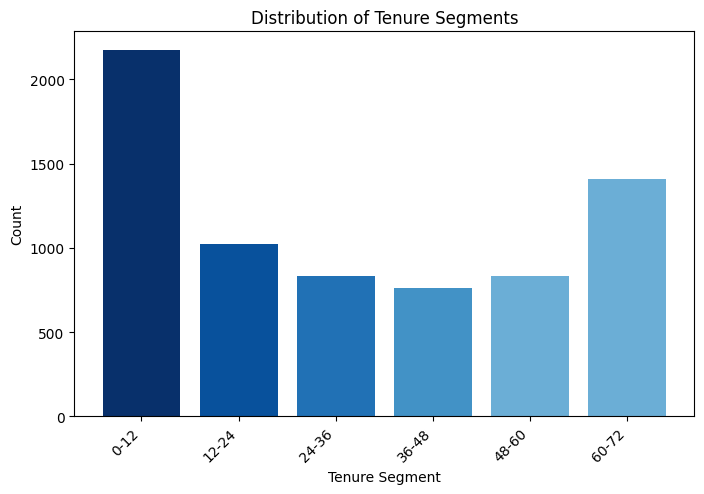

In [94]:
# tenure_segment


# Calculate the count of each tenure segment
tenure_counts = df['tenure_segment'].value_counts()

# Sort the tenure segments based on their counts
sorted_tenure_segments = tenure_counts.sort_index()

# Define a custom colormap with darker shades of blue
colors = ['#08306b', '#08519c', '#2171b5', '#4292c6', '#6baed6']
custom_cmap = ListedColormap(colors, name='custom_cmap')

# Create a bar plot with the custom colormap
plt.figure(figsize=(8, 5))
plt.bar(sorted_tenure_segments.index, sorted_tenure_segments.values, color=custom_cmap(range(len(sorted_tenure_segments))))
plt.xlabel('Tenure Segment')
plt.ylabel('Count')
plt.title('Distribution of Tenure Segments')
plt.xticks(rotation=45, ha='right')
plt.show()


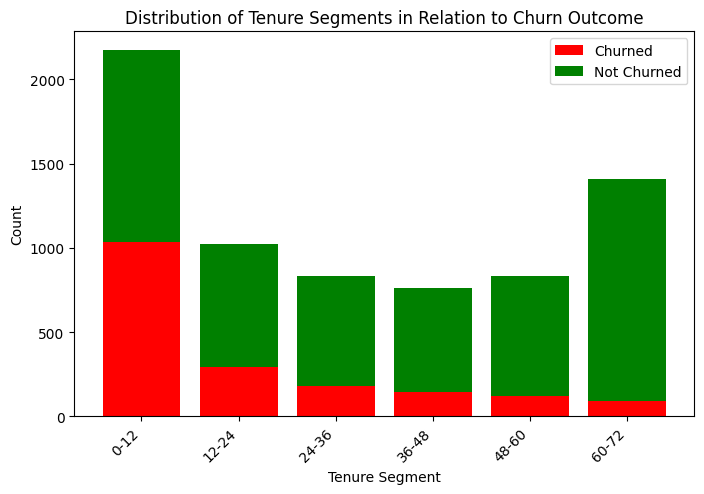

In [95]:


# Calculate the count of each tenure segment for both churned and not churned customers
tenure_counts_churned = df[df['churn'] == 1]['tenure_segment'].value_counts()
tenure_counts_not_churned = df[df['churn'] == 0]['tenure_segment'].value_counts()

# Sort the tenure segments based on their counts
sorted_tenure_segments = tenure_counts_churned.add(tenure_counts_not_churned, fill_value=0).sort_index()

# Define colors for churned (red) and not churned (forest green) customers
churned_color = 'r'  # Red color
not_churned_color = 'g'  # Forest green color

# Create a bar plot with the custom colors (stacked bars for churned and not churned customers)
plt.figure(figsize=(8, 5))
churned_bars = plt.bar(sorted_tenure_segments.index, tenure_counts_churned.reindex(sorted_tenure_segments.index, fill_value=0), color=churned_color, label='Churned')
not_churned_bars = plt.bar(sorted_tenure_segments.index, tenure_counts_not_churned.reindex(sorted_tenure_segments.index, fill_value=0), color=not_churned_color, bottom=tenure_counts_churned.reindex(sorted_tenure_segments.index, fill_value=0), label='Not Churned')
plt.xlabel('Tenure Segment')
plt.ylabel('Count')
plt.title('Distribution of Tenure Segments in Relation to Churn Outcome')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()

In [96]:

tenure_segment_counts = df['tenure_segment'].value_counts().reset_index()
print(tenure_segment_counts)

  tenure_segment  count
0           0-12   2175
1          60-72   1406
2          12-24   1024
3          24-36    832
4          48-60    832
5          36-48    760


In [97]:
# Contract tenure interaction

df['contract_tenure_interaction'] = df['contract_type'] * df['tenure']


In [98]:
# binning tenure

bins = [0, 12, 36, 60, 72]
labels = ['short', 'medium', 'long', 'very_long']
df['tenure_bin'] = pd.cut(df['tenure'], bins=bins, labels=labels)


# Instantiate a LabelEncoder
labelencoder = LabelEncoder()

# Apply LabelEncoder to the 'tenure_bin' column
df['tenure_bin'] = labelencoder.fit_transform(df['tenure_bin'])



In [99]:
# polynomial charges for monthly charges

df['monthly_charges_squared'] = df['monthly_charges'] ** 2


In [100]:
# sum of online services

df['total_online_services'] = df['online_security'] + df['online_backup'] + df['tech_support']


In [101]:
# boolean feature for streamig services

df['has_streaming'] = df['streaming_tv'] & df['streaming_movies']


In [102]:
# log transformation for total charges 
df['log_total_charges'] = np.log1p(df['total_charges'])

df['log_total_charges'] = df['log_total_charges'].round().astype('int64')


In [103]:

df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tenure_segment,age_segment,total_services,average_monthly_charge,contract_tenure_interaction,tenure_bin,monthly_charges_squared,total_online_services,has_streaming,log_total_charges
0,0,0,1,0,1,0,1,0,0,2,...,0-12,non-senior,0,29.000000,0,2,841,2,0,3
1,1,0,0,0,34,1,0,0,2,0,...,24-36,non-senior,4,55.558824,34,1,3136,2,0,8
2,1,0,0,0,2,1,0,0,2,2,...,0-12,non-senior,2,54.000000,0,2,2809,4,0,5
4,0,0,0,0,2,1,0,1,0,0,...,0-12,non-senior,0,75.500000,0,2,4900,0,0,5
5,0,0,0,0,8,1,2,1,0,0,...,0-12,non-senior,2,102.500000,0,2,9801,0,2,7


### PRE-PROCESSING

In [104]:
df.dtypes

gender                            int64
senior_citizen                    int64
partner                           int64
dependents                        int64
tenure                            int64
phone_service                     int64
multiple_lines                    int64
internet_service                  int64
online_security                   int64
online_backup                     int64
device_protection                 int64
tech_support                      int64
streaming_tv                      int64
streaming_movies                  int64
contract_type                     int64
paperless_billing                 int64
payment_method                    int64
monthly_charges                   int64
total_charges                     int64
churn                             int64
multiple_lines_label             object
gender_label                     object
partner_label                    object
dependents_label                 object
contract_type_label              object


In [105]:
df = df.drop(columns=['multiple_lines_label', 'gender_label', 'partner_label', 'dependents_label', 'contract_type_label', 'payment_method_label'])


In [106]:
df.dtypes

gender                            int64
senior_citizen                    int64
partner                           int64
dependents                        int64
tenure                            int64
phone_service                     int64
multiple_lines                    int64
internet_service                  int64
online_security                   int64
online_backup                     int64
device_protection                 int64
tech_support                      int64
streaming_tv                      int64
streaming_movies                  int64
contract_type                     int64
paperless_billing                 int64
payment_method                    int64
monthly_charges                   int64
total_charges                     int64
churn                             int64
senior_tech_support               int64
tenure_segment                 category
age_segment                      object
total_services                    int64
average_monthly_charge          float64


In [107]:
# encoding - label encoder


# Create label encoders
tenure_segment_encoder = LabelEncoder()
age_segment_encoder = LabelEncoder()

# Fit and transform the encoders on the relevant columns
df['tenure_segment'] = tenure_segment_encoder.fit_transform(df['tenure_segment'])
df['age_segment'] = age_segment_encoder.fit_transform(df['age_segment'])



In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7040 entries, 0 to 7044
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       7040 non-null   int64  
 1   senior_citizen               7040 non-null   int64  
 2   partner                      7040 non-null   int64  
 3   dependents                   7040 non-null   int64  
 4   tenure                       7040 non-null   int64  
 5   phone_service                7040 non-null   int64  
 6   multiple_lines               7040 non-null   int64  
 7   internet_service             7040 non-null   int64  
 8   online_security              7040 non-null   int64  
 9   online_backup                7040 non-null   int64  
 10  device_protection            7040 non-null   int64  
 11  tech_support                 7040 non-null   int64  
 12  streaming_tv                 7040 non-null   int64  
 13  streaming_movies       

In [109]:

# Mask for non-finite values
mask_non_finite = ~np.isfinite(df['average_monthly_charge'])

# Calculate the mean of the finite values
mean_finite_values = df.loc[~mask_non_finite, 'average_monthly_charge'].mean()

# Replace non-finite values with the mean of the finite values
df.loc[mask_non_finite, 'average_monthly_charge'] = mean_finite_values

# Convert the 'average_monthly_charge' column to integer type
df['average_monthly_charge'] = df['average_monthly_charge'].astype('int64')


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7040 entries, 0 to 7044
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       7040 non-null   int64
 1   senior_citizen               7040 non-null   int64
 2   partner                      7040 non-null   int64
 3   dependents                   7040 non-null   int64
 4   tenure                       7040 non-null   int64
 5   phone_service                7040 non-null   int64
 6   multiple_lines               7040 non-null   int64
 7   internet_service             7040 non-null   int64
 8   online_security              7040 non-null   int64
 9   online_backup                7040 non-null   int64
 10  device_protection            7040 non-null   int64
 11  tech_support                 7040 non-null   int64
 12  streaming_tv                 7040 non-null   int64
 13  streaming_movies             7040 non-null   int64
 1

In [111]:
# Define the columns you want to keep
columns_to_keep = [
    "gender", "senior_citizen", "partner", "dependents", "tenure", 
    "phone_service", "multiple_lines", "internet_service", "online_security", 
    "online_backup", "device_protection", "tech_support", "streaming_tv", 
    "streaming_movies", "contract_type", "paperless_billing", "payment_method", 
    "monthly_charges", "total_charges", "churn"
]

# Create a new DataFrame with only those columns
new_df = df[columns_to_keep].copy()



In [112]:
new_df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29,29,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56,1889,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53,108,1
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70,151,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99,820,1


In [113]:
# Define the columns you want to include
columns_to_include = [
    "gender", "senior_citizen", "partner", "dependents", "tenure", 
    "phone_service", "multiple_lines", "internet_service", "online_security", 
    "online_backup", "device_protection", "tech_support", "streaming_tv", 
    "streaming_movies", "contract_type", "paperless_billing", "payment_method", 
    "monthly_charges", "total_charges", "churn", "senior_tech_support",
    "tenure_segment", "age_segment", "total_services", "average_monthly_charge",
    "contract_tenure_interaction",  "tenure_bin", "monthly_charges_squared",
    "total_online_services", "has_streaming", "log_total_charges",
]

# Create a new DataFrame with those columns
engineered_df = df[columns_to_include].copy()


In [114]:
engineered_df.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,tenure_segment,age_segment,total_services,average_monthly_charge,contract_tenure_interaction,tenure_bin,monthly_charges_squared,total_online_services,has_streaming,log_total_charges
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,29,0,2,841,2,0,3
1,1,0,0,0,34,1,0,0,2,0,...,2,0,4,55,34,1,3136,2,0,8
2,1,0,0,0,2,1,0,0,2,2,...,0,0,2,54,0,2,2809,4,0,5
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,75,0,2,4900,0,0,5
5,0,0,0,0,8,1,2,1,0,0,...,0,0,2,102,0,2,9801,0,2,7


In [115]:
engineered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7040 entries, 0 to 7044
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       7040 non-null   int64
 1   senior_citizen               7040 non-null   int64
 2   partner                      7040 non-null   int64
 3   dependents                   7040 non-null   int64
 4   tenure                       7040 non-null   int64
 5   phone_service                7040 non-null   int64
 6   multiple_lines               7040 non-null   int64
 7   internet_service             7040 non-null   int64
 8   online_security              7040 non-null   int64
 9   online_backup                7040 non-null   int64
 10  device_protection            7040 non-null   int64
 11  tech_support                 7040 non-null   int64
 12  streaming_tv                 7040 non-null   int64
 13  streaming_movies             7040 non-null   int64
 1

#### STANDARDISATION (SCALING)

In [116]:
# new_df (original df w/o the added feature engineered columns)

# Extract the "Churn" column (target variable)
y = new_df['churn']

# Drop the "Churn" column from the DataFrame before scaling
new_df_encoded_features = new_df.drop(columns=['churn'])

# Initialize StandardScaler
scaler = StandardScaler()

# Perform scaling on the numeric columns
numeric_columns = new_df_encoded_features.select_dtypes(include=['int64', 'float64']).columns
new_df_encoded_scaled = new_df_encoded_features.copy()
new_df_encoded_scaled[numeric_columns] = scaler.fit_transform(new_df_encoded_features[numeric_columns])

# Add the "Churn" column back to the DataFrame
new_df_encoded_scaled['churn'] = y

# Now, you can use the head() method to view the first few rows of the scaled DataFrame
new_df_encoded_scaled.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,-1.009133,-0.440028,1.034398,-0.65399,-1.277077,-3.058258,0.062746,-1.183224,-0.918470,1.242561,-1.027549,-0.924895,-1.113453,-1.121366,-0.827863,0.829608,0.398029,-1.173760,-0.995528,0
1,0.990950,-0.440028,-0.966746,-0.65399,0.066721,0.326984,-0.991508,-1.183224,1.407858,-1.029846,1.245490,-0.924895,-1.113453,-1.121366,0.371593,-1.205389,1.334568,-0.276142,-0.173934,0
2,0.990950,-0.440028,-0.966746,-0.65399,-1.236356,0.326984,-0.991508,-1.183224,1.407858,1.242561,-1.027549,-0.924895,-1.113453,-1.121366,-0.827863,0.829608,1.334568,-0.375877,-0.960633,1
4,-1.009133,-0.440028,-0.966746,-0.65399,-1.236356,0.326984,-0.991508,0.172333,-0.918470,-1.029846,-1.027549,-0.924895,-1.113453,-1.121366,-0.827863,0.829608,0.398029,0.189289,-0.941639,1
5,-1.009133,-0.440028,-0.966746,-0.65399,-0.992029,0.326984,1.117000,0.172333,-0.918470,-1.029846,1.245490,-0.924895,1.146518,1.138378,-0.827863,0.829608,0.398029,1.153397,-0.646130,1


In [117]:
# engineered_df (updated df with the added feature engineered columns)

# Extract the "Churn" column (target variable)
y = new_df['churn']

# Drop the "Churn" column from the DataFrame before scaling
engineered_df_encoded_features = engineered_df.drop(columns=['churn'])

# Initialize StandardScaler
scaler = StandardScaler()

# Perform scaling on the numeric columns
numeric_columns = engineered_df_encoded_features.select_dtypes(include=['int64', 'float64']).columns
engineered_df_encoded_scaled = engineered_df_encoded_features.copy()
engineered_df_encoded_scaled[numeric_columns] = scaler.fit_transform(engineered_df_encoded_features[numeric_columns])

# Add the "Churn" column back to the DataFrame
engineered_df_encoded_scaled['churn'] = y

# Now, you can use the head() method to view the first few rows of the scaled DataFrame
engineered_df_encoded_scaled.head()


,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,...,age_segment,total_services,average_monthly_charge,contract_tenure_interaction,tenure_bin,monthly_charges_squared,total_online_services,has_streaming,log_total_charges,churn
0,-1.009133,-0.440028,1.034398,-0.65399,-1.277077,-3.058258,0.062746,-1.183224,-0.918470,1.242561,...,-0.440028,-1.369570,-1.160842,-0.713270,0.486784,-1.121179,-0.273143,-0.898682,-2.463146,0
1,0.990950,-0.440028,-0.966746,-0.65399,0.066721,0.326984,-0.991508,-1.183224,1.407858,-1.029846,...,-0.440028,0.830116,-0.307692,-0.041183,-0.461986,-0.508400,-0.273143,-0.898682,0.658240,0
2,0.990950,-0.440028,-0.966746,-0.65399,-1.236356,0.326984,-0.991508,-1.183224,1.407858,1.242561,...,-0.440028,-0.269727,-0.340505,-0.713270,0.486784,-0.595711,0.835491,-0.898682,-1.214591,1
4,-1.009133,-0.440028,-0.966746,-0.65399,-1.236356,0.326984,-0.991508,0.172333,-0.918470,-1.029846,...,-0.440028,-1.369570,0.348578,-0.713270,0.486784,-0.037402,-1.381777,-0.898682,-1.214591,1
5,-1.009133,-0.440028,-0.966746,-0.65399,-0.992029,0.326984,1.117000,0.172333,-0.918470,-1.029846,...,-0.440028,-0.269727,1.234541,-0.713270,0.486784,1.271195,-1.381777,1.443246,0.033963,1


In [118]:
correlation_with_churn = new_df_encoded_scaled.corr()['churn'].sort_values(ascending=False)

print(correlation_with_churn)


churn                1.000000
monthly_charges      0.193341
paperless_billing    0.191754
senior_citizen       0.150794
payment_method       0.106742
multiple_lines       0.038062
phone_service        0.011465
gender              -0.008361
streaming_tv        -0.036586
streaming_movies    -0.038499
internet_service    -0.047264
partner             -0.150567
dependents          -0.164252
device_protection   -0.177965
online_backup       -0.195549
total_charges       -0.199328
tech_support        -0.282334
online_security     -0.289153
tenure              -0.352102
contract_type       -0.396623
Name: churn, dtype: float64


Correlation with binary values are less than continuous data, as there is less variablilty in a binary variable.
The range of possible values for each feature is restricted when using standard standardised data (scaling), affecting the magnitude of the correlation coefficients.



In [119]:
new_df_encoded_scaled.corr()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type,paperless_billing,payment_method,monthly_charges,total_charges,churn
gender,1.000000,-0.001688,-0.001682,0.010490,0.004719,-0.006645,-0.006768,-0.000937,-0.015455,-0.012106,0.000183,-0.007254,-0.006431,-0.008750,-0.000200,-0.011537,0.017987,-0.015101,0.000013,-0.008361
senior_citizen,-0.001688,1.000000,0.016427,-0.211228,0.016744,0.008226,0.146226,-0.032288,-0.128072,-0.013615,-0.021241,-0.151127,0.030786,0.047278,-0.142443,0.156477,-0.038847,0.220114,0.102478,0.150794
partner,-0.001682,0.016427,1.000000,0.452469,0.379786,0.016845,0.142171,0.000914,0.150923,0.152881,0.166405,0.126814,0.137076,0.129304,0.294796,-0.015336,-0.155090,0.096584,0.318360,-0.150567
dependents,0.010490,-0.211228,0.452469,1.000000,0.159542,-0.002404,-0.025329,0.044607,0.152092,0.090697,0.080429,0.133440,0.046553,0.020979,0.243018,-0.111835,-0.040273,-0.114172,0.064094,-0.164252
tenure,0.004719,0.016744,0.379786,0.159542,1.000000,0.008553,0.342995,-0.030465,0.325189,0.370812,0.370887,0.322664,0.289310,0.296809,0.671473,0.006162,-0.370115,0.247766,0.824668,-0.352102
phone_service,-0.006645,0.008226,0.016845,-0.002404,0.008553,1.000000,-0.020517,0.386895,-0.014012,0.024229,0.003717,-0.017986,0.054364,0.043943,0.003077,0.016424,-0.005404,0.247262,0.112801,0.011465
multiple_lines,-0.006768,0.146226,0.142171,-0.025329,0.342995,-0.020517,1.000000,-0.109064,0.006942,0.117195,0.122171,0.011270,0.174949,0.180849,0.110681,0.164924,-0.176864,0.433262,0.452714,0.038062
internet_service,-0.000937,-0.032288,0.000914,0.044607,-0.030465,0.386895,-0.109064,1.000000,-0.028283,0.035928,0.045121,-0.025912,0.107246,0.098176,0.099710,-0.138659,0.086311,-0.323076,-0.175337,-0.047264
online_security,-0.015455,-0.128072,0.150923,0.152092,0.325189,-0.014012,0.006942,-0.028283,1.000000,0.185167,0.175573,0.284623,0.044683,0.055976,0.374194,-0.157610,-0.096157,-0.054013,0.254012,-0.289153
online_backup,-0.012106,-0.013615,0.152881,0.090697,0.370812,0.024229,0.117195,0.035928,0.185167,1.000000,0.187794,0.195794,0.146874,0.136407,0.280859,-0.013681,-0.124862,0.119366,0.375092,-0.195549


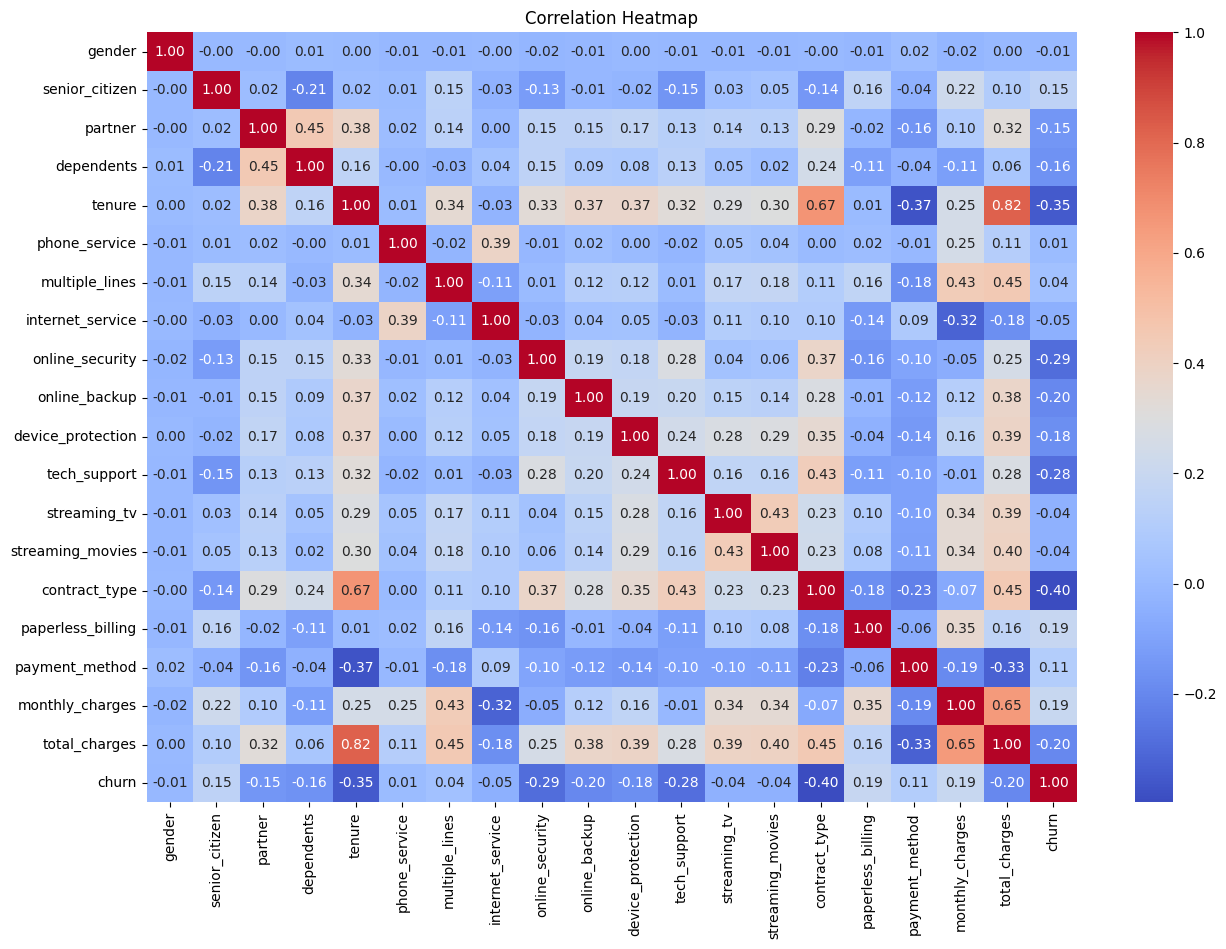

In [120]:

corr_matrix = new_df_encoded_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


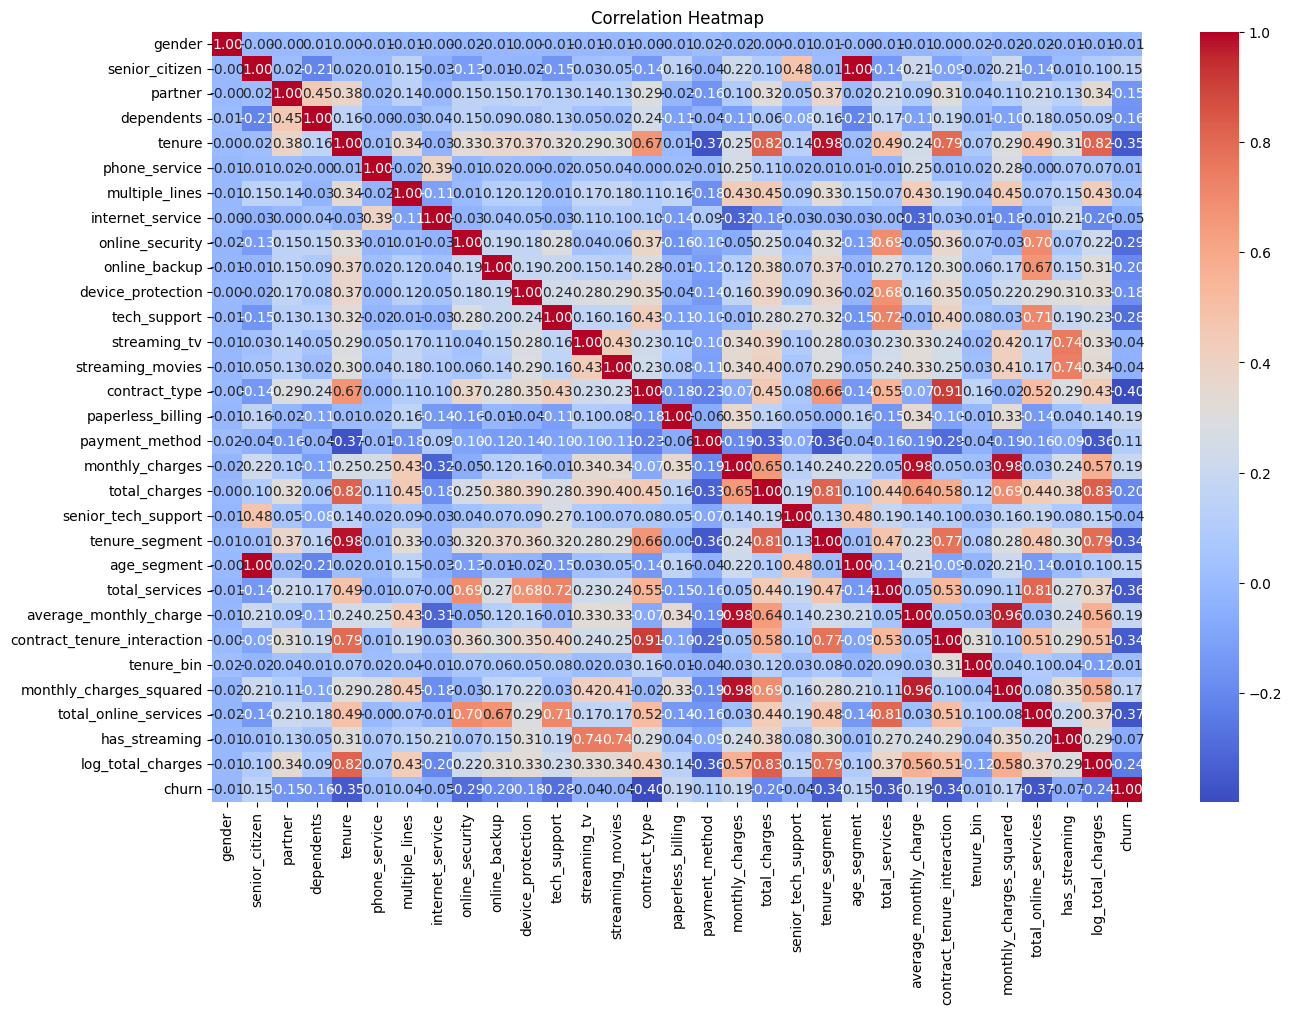

In [121]:

corr_matrix = engineered_df_encoded_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')

plt.title("Correlation Heatmap")
plt.show()


### MODEL BUILDING

In [122]:
# new_df (Logistic regression)

# Split the data into X (predictors) and y (target)
X = new_df_encoded_scaled.drop(columns=['churn'])
y = new_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.81
Confusion Matrix:
[[924 110]
 [162 212]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1034
           1       0.66      0.57      0.61       374

    accuracy                           0.81      1408
   macro avg       0.75      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [123]:
# engineered_df (Logistic regression)

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logreg_model = LogisticRegression()

# Train the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.81
Confusion Matrix:
[[931 103]
 [166 208]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1034
           1       0.67      0.56      0.61       374

    accuracy                           0.81      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [124]:
# gridsearch for LogisticRegression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Inverse of regularization strength
    'penalty': ['l1', 'l2'], # Specifies the norm used in the penalization
    'solver': ['liblinear'] # Algorithm to use in the optimization problem
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid,
                           cv=5, # Number of cross-validation folds
                           verbose=1, # Verbose output to see progress
                           scoring='accuracy', # Scoring metric
                           n_jobs=-1) # Use all available processors

# Split your data into training and testing sets as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model's performance on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.81
Confusion Matrix:
[[931 103]
 [165 209]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1034
           1       0.67      0.56      0.61       374

    accuracy                           0.81      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [125]:
# logistic regression - Tuned

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameters from grid search
C = 10
penalty = 'l1'
solver = 'liblinear'

# Initialize the logistic regression model with best parameters
logreg_model_tuned = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42)

# Train the model on the training data
logreg_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.81
Confusion Matrix:
[[931 103]
 [165 209]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1034
           1       0.67      0.56      0.61       374

    accuracy                           0.81      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [126]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the Training Data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Hyperparameters from grid search
C = 10
penalty = 'l1'
solver = 'liblinear'

# Initialize the logistic regression model with best parameters
logreg_model_tuned = LogisticRegression(C=C, penalty=penalty, solver=solver, random_state=42)

# Train the model on the RESAMPLED training data
logreg_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = logreg_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.74
Confusion Matrix:
[[744 290]
 [ 72 302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1034
           1       0.51      0.81      0.63       374

    accuracy                           0.74      1408
   macro avg       0.71      0.76      0.71      1408
weighted avg       0.81      0.74      0.76      1408



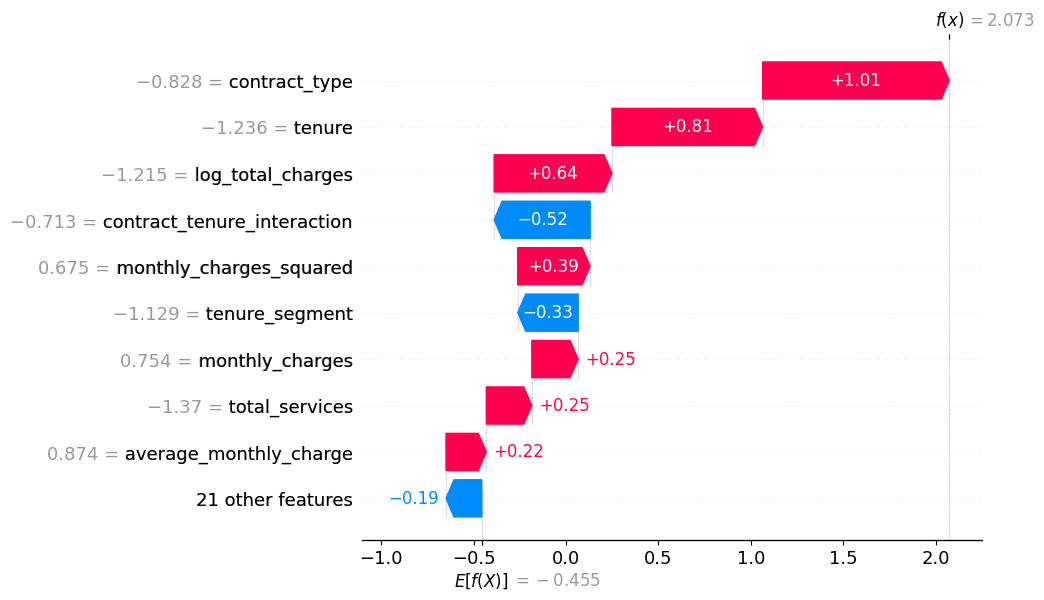

In [127]:
# Logistic Regression (SHAP)
import shap

# Create an explainer object for your model
explainer = shap.LinearExplainer(logreg_model_tuned, X_train)

# Compute the SHAP values for the test set
shap_values = explainer(X_test)

# Visualize the SHAP values for a specific prediction
shap.plots.waterfall(shap_values[0])



In [128]:
# SVC

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM classifier
svm_model = SVC()

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[938  96]
 [189 185]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1034
           1       0.66      0.49      0.56       374

    accuracy                           0.80      1408
   macro avg       0.75      0.70      0.72      1408
weighted avg       0.79      0.80      0.79      1408



In [129]:
# gridearch for SVC
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100], # Regularization parameter
    'kernel': ['linear', 'rbf'], # Specifies the kernel type to be used
    'gamma': ['scale', 'auto'], # Kernel coefficient for 'rbf'
}

# Create an SVC model
svm_model = SVC()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid,
                           cv=5, # Number of cross-validation folds
                           verbose=1, # Verbose output to see progress
                           scoring='accuracy', # Scoring metric
                           n_jobs=-1) # Use all available processors

# Split your data into training and testing sets as before
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the model's performance on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.80
Confusion Matrix:
[[945  89]
 [186 188]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1034
           1       0.68      0.50      0.58       374

    accuracy                           0.80      1408
   macro avg       0.76      0.71      0.73      1408
weighted avg       0.79      0.80      0.79      1408



In [130]:

# Decision Tree Classifier

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.73
Confusion Matrix:
[[834 200]
 [176 198]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1034
           1       0.50      0.53      0.51       374

    accuracy                           0.73      1408
   macro avg       0.66      0.67      0.66      1408
weighted avg       0.74      0.73      0.74      1408



In [131]:
# gridsearch for Decision Tree 

from sklearn.model_selection import GridSearchCV

# Define the hyperparameters and their possible values
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model's performance on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
Accuracy: 0.77
Confusion Matrix:
[[889 145]
 [180 194]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1034
           1       0.57      0.52      0.54       374

    accuracy                           0.77      1408
   macro avg       0.70      0.69      0.69      1408
weighted avg       0.76      0.77      0.77      1408



In [132]:
# Decision Tree Classifier

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier with the best hyperparameters
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=1, 
                                  min_samples_split=2, splitter='best', random_state=42)

# Train the model on the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.76
Confusion Matrix:
[[852 182]
 [160 214]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1034
           1       0.54      0.57      0.56       374

    accuracy                           0.76      1408
   macro avg       0.69      0.70      0.69      1408
weighted avg       0.76      0.76      0.76      1408



In [133]:
# RandomForest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # You can customize the number of trees using n_estimators

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.79
Confusion Matrix:
[[934 100]
 [190 184]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1034
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1408
   macro avg       0.74      0.70      0.71      1408
weighted avg       0.78      0.79      0.78      1408



In [134]:
# gridsearch for RandomForest
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Evaluate the best model
best_grid_model = grid_search.best_estimator_
y_pred = best_grid_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4, min

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=4,

[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=best; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=1, min_samples_split=10, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=2, min_samples_split=5, splitter=random; total time=   0.0s
[CV] END criterion=gini, max_depth=None, min_samples_leaf=

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.81
Confusion Matrix:
[[943  91]
 [172 202]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1034
           1       0.69      0.54      0.61       374

    accuracy                           0.81      1408
   macro avg       0.77      0.73      0.74      1408
weighted avg       0.80      0.81      0.81      1408



In [147]:
# best model - tuned 

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_model_tuned = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Train the model on the training data
rf_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.81
Confusion Matrix:
[[936  98]
 [170 204]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1034
           1       0.68      0.55      0.60       374

    accuracy                           0.81      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [148]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the Training Data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_model_tuned = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Train the model on the RESAMPLED training data
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.75
Confusion Matrix:
[[749 285]
 [ 72 302]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1034
           1       0.51      0.81      0.63       374

    accuracy                           0.75      1408
   macro avg       0.71      0.77      0.72      1408
weighted avg       0.81      0.75      0.76      1408



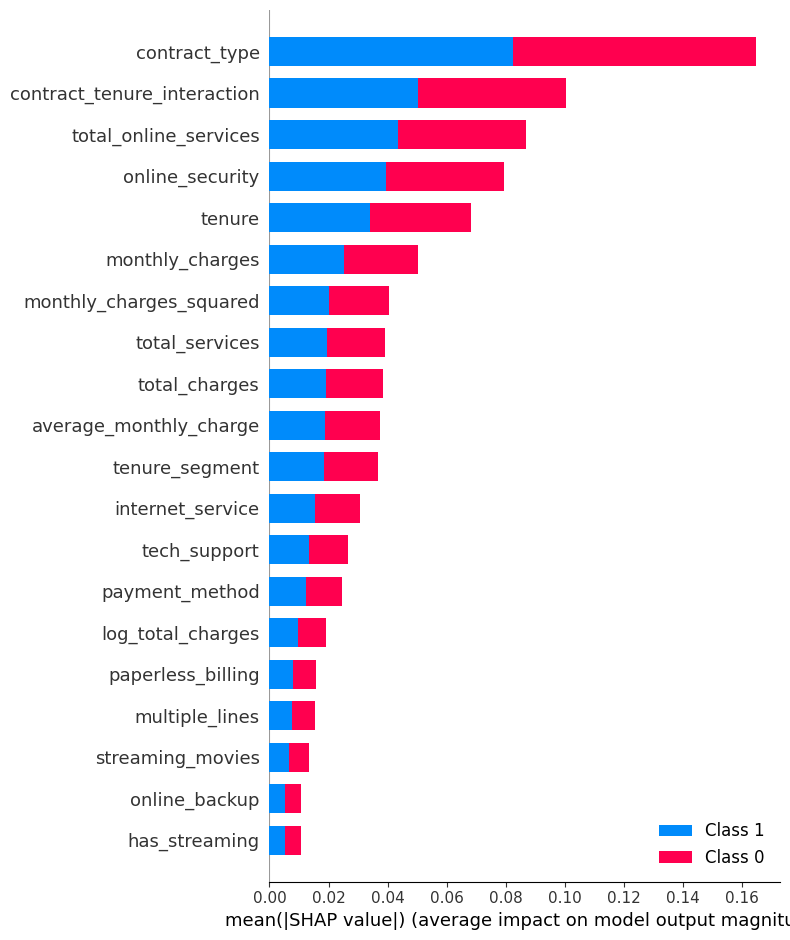

In [149]:
import shap

# Create a TreeExplainer object for your Random Forest model
explainer = shap.TreeExplainer(rf_model_tuned)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for a specific prediction
shap.summary_plot(shap_values, X_test)


In [150]:
#pip install imbalanced-learn


In [151]:
# Re-sampling techniques (SMOTE) - oversampling minority classes
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.78
Confusion Matrix:
[[838 196]
 [109 265]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.81      0.85      1034
           1       0.57      0.71      0.63       374

    accuracy                           0.78      1408
   macro avg       0.73      0.76      0.74      1408
weighted avg       0.80      0.78      0.79      1408



In [152]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the SMOTE instance with specific parameters
smote = SMOTE(sampling_strategy=0.5, k_neighbors=5, random_state=42)

# Fit on training data and return a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50, random_state=42)

# Train the model on the resampled training data
rf_model.fit(X_resampled, y_resampled)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[900 134]
 [146 228]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.87      1034
           1       0.63      0.61      0.62       374

    accuracy                           0.80      1408
   macro avg       0.75      0.74      0.74      1408
weighted avg       0.80      0.80      0.80      1408



In [153]:
# SMOTE tuning 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Create a pipeline
pipeline = Pipeline([
    ('smote', smote),
    ('random_forest', rf_model)
])

# Parameters to tune
param_grid = {
    'smote__sampling_strategy': [0.5, 0.75, 1.0],
    'smote__k_neighbors': [3, 5, 7],
    'random_forest__n_estimators': [50],
    'random_forest__max_depth': [10],
    'random_forest__min_samples_leaf': [1],
    'random_forest__min_samples_split': [5],
    'random_forest__bootstrap': [True]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Best Parameters: {'random_forest__bootstrap': True, 'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 1, 'random_forest__min_samples_split': 5, 'random_forest__n_estimators': 50, 'smote__k_neighbors': 7, 'smote__sampling_strategy': 0.5}
Accuracy: 0.80
Confusion Matrix:
[[906 128]
 [152 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1034
           1       0.63      0.59      0.61       374

    accuracy                           0.80      1408
   macro avg       0.75      0.73      0.74      1408
weighted avg       0.80      0.80      0.80      1408



In [154]:
# SMOTE - Random Forests (SMOTE- tuned)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE
smote = SMOTE(sampling_strategy=0.5, k_neighbors=7, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Initialize the Random Forest Classifier with the best hyperparameters
rf_model_tuned_1 = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=50,
    random_state=42
)

# Train the model on the resampled training data
rf_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = rf_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.80
Confusion Matrix:
[[906 128]
 [152 222]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1034
           1       0.63      0.59      0.61       374

    accuracy                           0.80      1408
   macro avg       0.75      0.73      0.74      1408
weighted avg       0.80      0.80      0.80      1408



In [155]:
# Gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

print(f"Accuracy (Gradient Boosting): {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)


Accuracy (Gradient Boosting): 0.81
Confusion Matrix:
[[936  98]
 [171 203]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.87      1034
           1       0.67      0.54      0.60       374

    accuracy                           0.81      1408
   macro avg       0.76      0.72      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [156]:
#pip install xgboost


In [157]:
# Gradient boosting classifier

import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize XGBoost Classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=sum(y_train==0) / sum(y_train==1), random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

print(f"Accuracy (XGBoost): {accuracy_xgb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)


Accuracy (XGBoost): 0.77
Confusion Matrix:
[[835 199]
 [123 251]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1034
           1       0.56      0.67      0.61       374

    accuracy                           0.77      1408
   macro avg       0.71      0.74      0.72      1408
weighted avg       0.79      0.77      0.78      1408



In [159]:
# hyperparameter tuning (gradient boosting) - gridsearch

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2],
}

# Initialize Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits


KeyboardInterrupt: 

In [160]:
# GradientBoosting - tuned model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Hyperparameters based on the output from GridSearch
learning_rate = 0.1
max_depth = 3
min_samples_leaf = 4
min_samples_split = 10
n_estimators = 100

# Initialize Gradient Boosting Classifier with the specific hyperparameters
gb_model_tuned = GradientBoostingClassifier(
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    n_estimators=n_estimators,
    random_state=42)

# Train the model on the training data
gb_model_tuned.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the results
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)


Accuracy (Gradient Boosting): 0.81
Confusion Matrix:
[[935  99]
 [168 206]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1034
           1       0.68      0.55      0.61       374

    accuracy                           0.81      1408
   macro avg       0.76      0.73      0.74      1408
weighted avg       0.80      0.81      0.80      1408



In [161]:
from imblearn.under_sampling import RandomUnderSampler
# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply random under-sampling
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)


In [162]:
# Initialize Gradient Boosting Classifier with specific hyperparameters
gb_model_tuned = GradientBoostingClassifier(
    learning_rate=learning_rate,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    min_samples_split=min_samples_split,
    n_estimators=n_estimators,
    random_state=42)

# Train the model on the RESAMPLED training data
gb_model_tuned.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_gb = gb_model_tuned.predict(X_test)

# Evaluate the model's performance
accuracy_gb = accuracy_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Print the results
print(f"Accuracy (Gradient Boosting): {accuracy_gb:.2f}")
print("Confusion Matrix:")
print(conf_matrix_gb)
print("Classification Report:")
print(class_report_gb)


Accuracy (Gradient Boosting): 0.75
Confusion Matrix:
[[752 282]
 [ 68 306]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1034
           1       0.52      0.82      0.64       374

    accuracy                           0.75      1408
   macro avg       0.72      0.77      0.72      1408
weighted avg       0.81      0.75      0.76      1408



No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


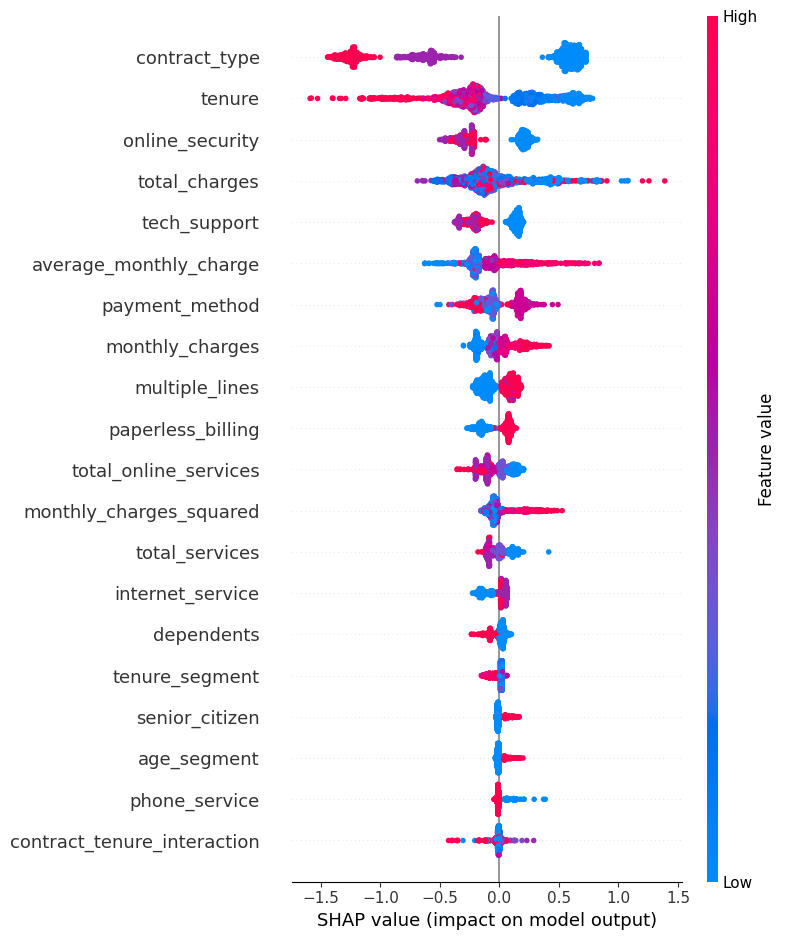

In [163]:
# Gradient boosting (SHAP)
import shap

# Create a TreeExplainer object for your Gradient Boosting model
explainer = shap.TreeExplainer(gb_model_tuned)

# Compute the SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values for a specific prediction
shap.summary_plot(shap_values, X_test)


### ENSEMBLE STACKING

In [164]:
# Ensemble stacking
# method used to combine different models to achieve a better predictive model
# Gradient Boosting & Random Forest models using Stacking Classifier


In [165]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Split the data into X (predictors) and y (target)
X = engineered_df_encoded_scaled.drop(columns=['churn'])
y = engineered_df_encoded_scaled['churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Random Under-Sampling to the Training Data
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# Define the base learners (make sure they are all trained on the resampled data)
base_learners = [
    ('gb_model', gb_model_tuned),
    ('rf_model', rf_model_tuned),
    ('logreg_model', logreg_model_tuned) # Include the tuned logistic regression model
]

# Initialize the Stacking Classifier with the base learners and a Logistic Regression as the final estimator
stack_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacking classifier on the RESAMPLED training data
stack_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_stack = stack_model.predict(X_test)

# Evaluate the model's performance
accuracy_stack = accuracy_score(y_test, y_pred_stack)
conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
class_report_stack = classification_report(y_test, y_pred_stack)

# Print the results
print(f"Accuracy (Stacking Ensemble): {accuracy_stack:.2f}")
print("Confusion Matrix:")
print(conf_matrix_stack)
print("Classification Report:")
print(class_report_stack)


Accuracy (Stacking Ensemble): 0.75
Confusion Matrix:
[[755 279]
 [ 74 300]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1034
           1       0.52      0.80      0.63       374

    accuracy                           0.75      1408
   macro avg       0.71      0.77      0.72      1408
weighted avg       0.81      0.75      0.76      1408



The Stacking Ensemble model achieved 75% accuracy in predicting customer churn, with recall of 80% in predicting churned customers, reflecting robust performance. 


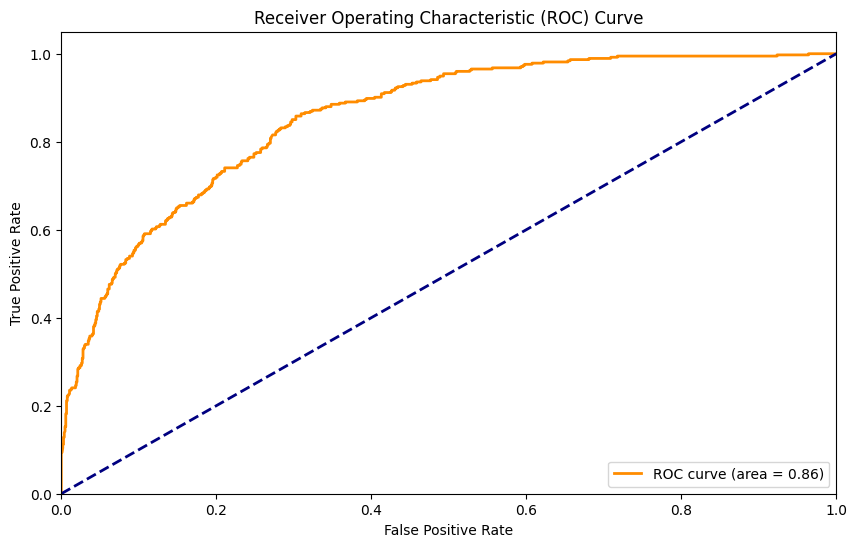

In [166]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split, resample, and define base learners code...

# Train the stacking classifier on the RESAMPLED training data
stack_model.fit(X_train_resampled, y_train_resampled)

# Other evaluation code...

# Predict the probabilities for the positive class (class 1)
y_pred_prob_stack = stack_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_stack)

# Compute the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



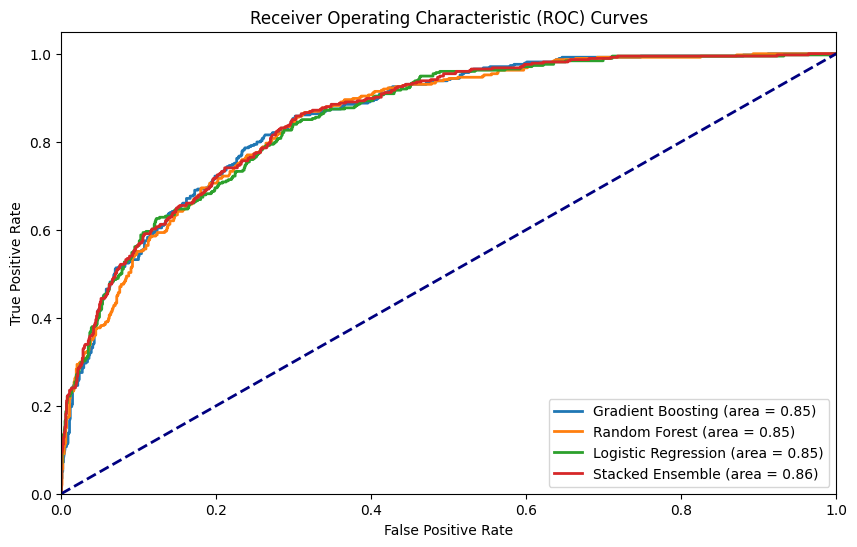

In [167]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Splitting, resampling, model initialization and training code...

# Define the individual models and their labels
models = {
    'Gradient Boosting': gb_model_tuned,
    'Random Forest': rf_model_tuned,
    'Logistic Regression': logreg_model_tuned,
    'Stacked Ensemble': stack_model
}

plt.figure(figsize=(10, 6))

# Plot ROC curves for individual models
for model_name, model in models.items():
    # Predict the probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    # Compute the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    # Compute the AUC (Area Under the Curve)
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


#### CROSS-VALIDATION

In [168]:
# cross-validation

from sklearn.model_selection import cross_val_score

# Define the number of folds
cv_folds = 5

# Perform cross-validation on the stacking model
cv_scores = cross_val_score(stack_model, X, y, cv=cv_folds, scoring='accuracy')

# Print the cross-validation scores for each fold
print(f"Cross-Validation Scores for {cv_folds} folds: {cv_scores}")

# Calculate and print the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print(f"Mean Cross-Validation Accuracy: {mean_cv_score:.2f}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score:.2f}")


Cross-Validation Scores for 5 folds: [0.81463068 0.80752841 0.79261364 0.81036932 0.80681818]
Mean Cross-Validation Accuracy: 0.81
Standard Deviation of Cross-Validation Accuracy: 0.01


- Cross-Validation Scores: Ranging from approximately 0.79 to 0.81 across five different folds, reflecting performance on different subsets of the data.
- Mean Cross-Validation Accuracy: The central measure of performance, with a mean accuracy of 0.81, indicating a good ability to classify instances correctly.
- Standard Deviation of Cross-Validation Accuracy: A value of 0.01, showing that the model's performance is consistent across different folds, with a low spread of scores around the mean.
- Overall Assessment: The stacking ensemble model demonstrates fairly consistent and robust performance across different subsets of the data, adding confidence to its ability to generalize to unseen data.

### MODEL SERIALISATION

In [169]:
import pickle

with open('stack_model.pkl', 'wb') as f:
    pickle.dump(stack_model, f)
